# Surprise Housing Company's Housing Price Prediction


## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- `Which variables are significant in predicting the price of a house, and`

- `How well those variables describe the price of a house.`

 

Also, determine the optimal value of `lambda for ridge and lasso regression.`

 

## Business Goal:

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing Packages for Visualization and model building

In [171]:
# Import required libraries

# Import library to filter warning
import warnings
warnings.filterwarnings('ignore')

# Import libraries for numerical and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import libraries for scalling the independent featurs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import libraries for model building - dataset spliting, feature selection and cross validation
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Import libraries for different metrics check for model goodness
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Import datte time library

from datetime import date


# Set max rows and columns display options
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",500)

# Reset matplotlib style
%matplotlib inline

### Reading Input CSV File

In [172]:
# Reading the input dataset

# Dataset path: G:\SAGNIK GHOSH\Machine Learning\Regularization\train.csv

surprise_housing_df = pd.read_csv(r"G:\SAGNIK GHOSH\Machine Learning\Regularization\train.csv")

# Displaying top 5 rows after reading dataset

surprise_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspecting Dataframe


##### Checking the Shape, Summary, Datatypes and Statistical information of the Dataset

In [173]:
# Checking shape (number of rows and columns) of dataset

surprise_housing_df.shape

(1460, 81)

- The dataset is having **`1460` rows** and **`81` columns**

In [174]:
# Checking summary (null, not null, row counts, datatypes etc.)

surprise_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The dataset is having **3 float columns**, **35 integer columns** and rest 43 are **object column**
- We can see there are many columns which contains `some null values`.

In [175]:
# Checking statistical information (min, max, mean, median, percentiles etc.) of dataset

surprise_housing_df.describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.0000

- From the `above describe statistical information` we can see there are `some outliers present` in some columns, as ther are some **sudden jump from 99% to max value.**

### Null value and Duplicate Analysis

#### Column wise null value calculation

In [176]:
# Checking null percentage enties in dataset columns

round((surprise_housing_df.isnull().sum()/surprise_housing_df.shape[0]*100),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

### Point Plot for null value analysis

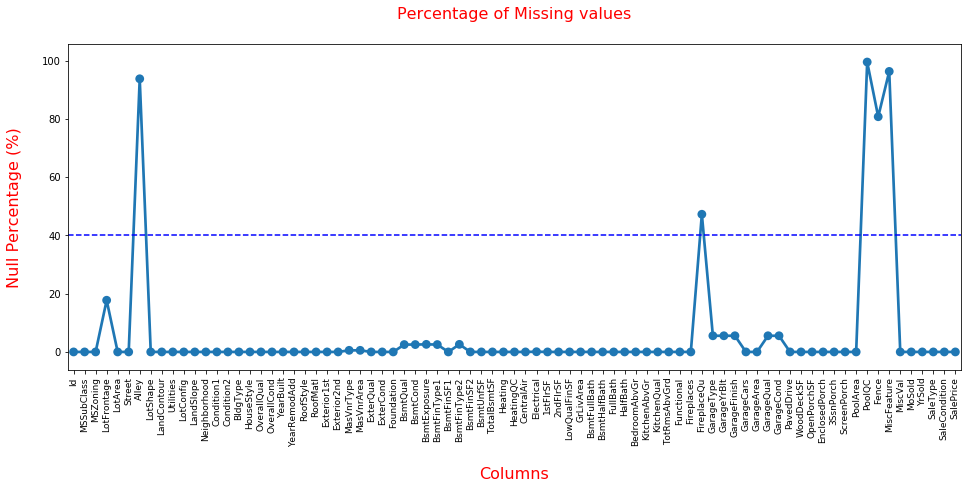

In [177]:
# Point Plot

# Setting the figure size for Point plot
plt.figure(figsize = (16,6))

# Point plot using seaborn
ax = sns.pointplot(surprise_housing_df.columns, round((surprise_housing_df.isnull().sum()/surprise_housing_df.shape[0]*100),2))

# Setting horizontal line at 40% 
ax.axhline(y=40, ls = '--', color = 'blue')

# Setting X- axis and Y- axix display size
plt.xticks(rotation =90,fontsize =9)

# Setting title for the plot
plt.title("Percentage of Missing values", fontsize = 16, color = 'red', pad = 25)

# Setting axis labels
plt.ylabel("Null Percentage (%)",fontsize = 16, color = 'red', labelpad = 20)
plt.xlabel("Columns",fontsize = 16, color = 'red', labelpad = 20)

# Displaying the plot using matplotlib.pyplot show() function
plt.show()

In [178]:
# Checking Total number of rows with more than 50% null values

row_wise_50_null_count = len(surprise_housing_df[round(100*(surprise_housing_df.isnull().sum(axis = 1)/surprise_housing_df.shape[1]),2)>50.00])

print( 'Total number of rows with more than 50% null values are : ', row_wise_50_null_count)

Total number of rows with more than 50% null values are :  0


#### Inference:

- There are `19 columns with null values`. `5 columns have more than 40% NaN (null values)` which we should drop as imputing these columns will introduce bias. 

- No rows present which have `more than 50% null values`.

### Duplicate Analysis:

In [179]:
# Duplicate analysis on 'Unique Identifier' columns like 'Id'

print("Total number of duplicate values in Prospect ID column :" , surprise_housing_df.duplicated(subset = 'Id').sum())

Total number of duplicate values in Prospect ID column : 0


#### Inference:
    
- `Id` is a unique identifier column.
- There are `no duplicate values present based on ID column`.

## Data Cleaning

- **Delete High Null Columns:** Dropping columns which are having more than 40% missing values
- **Missing Value Treatement:** Treaing missing values by imputing for columns with missing values less than or equal to 40%
    - For the numerical columns, imputing with `mean` value, if `no outliers` present else with `median`
    - For categorical columns, `dropping highly skewed` columns
    - For meaning full missing, creating `new category` for imputing missing value
    - Also, for some column like `MasVnrType` and `Electrical` are imputed with `mode` values

### Delete High Null value Columns

In [180]:
# Custom function to drop unnecessary columns

#Function Definition

def drop_cols(df, col_list):
    
    # Dropping columns from original DataFrame
    df.drop(col_list, axis = 1, inplace = True)

In [181]:
# Calling custom function to drop columns having more than 40% null values

# Specify list of columns
cols_to_be_dropped = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

# calling custom function for drop columns
drop_cols(surprise_housing_df, cols_to_be_dropped)

#### Inference:

- We have suceessfully `deleted 5 columns` where the columns had high null values more than 40%

In [182]:
# Checking shape of the DataFrame after dropping columns with null above 40%

surprise_housing_df.shape

(1460, 76)

- There are `76 columns` exist after deleting high null value columns

In [183]:
# Checking null percentage enties in dataset columns again after dropping columns with more than 40% null values

round((surprise_housing_df.isnull().sum()/surprise_housing_df.shape[0]*100),2).sort_values(ascending=False)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

#### Inference:

- There are still `14 column` exist with less than 20% missing values, which we are imputing in below

#### Segregating Categorical & Numerical Values

In [184]:

# Creating a list of categorical columns

categorical_col = surprise_housing_df.select_dtypes(include =["object"]).columns.values

# Creating a list of numerical columns

numerical_col = surprise_housing_df.select_dtypes(include =["int64","float64"]).columns.values

# Printing the list of columns of each type

print("Categorical Features : \n {} \n\n".format(categorical_col))
print("Numerical Features : \n {} ".format(numerical_col))

Categorical Features : 
 ['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleCondition'] 


Numerical Features : 
 ['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal'

### Missing value Treatment

- Imputing for columns with missing values less than 20% by numerical and categorical columns

In [185]:
# Numerical null value annalysis

# calculating null value percentage on numerical columns
numerical_null_analysis=round((surprise_housing_df[numerical_col].isnull().sum()/surprise_housing_df.shape[0]*100),2).sort_values(ascending=False)

# checking columns having null value greater than 0
numerical_null_analysis[numerical_null_analysis>0.00]

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64

#### Inference:

- There are three numerical columns `LotFrontage`, `GarageYrBlt` and `MasVnrArea` with approx. 17%, 5.55% and 0.55% misssing values, which will be imputed with `mean` or `median` values

#### Numerical Columns Null Value Treatment:

In [186]:
# Custom function for box plot and dist plot of numerical columns analysis

def plot_func(df, col):
    
    # Setting figure size
    plt.figure(figsize = (12,6))
    
    # Setting subplot coordinate
    plt.subplot(1,2,1)
    
    # Setting axis label and display parameters
    plt.xlabel(col,fontsize = 16, color = 'red', labelpad = 20)
    plt.ylabel('Density',fontsize = 16, color = 'red', labelpad = 20)
    
    # Plotting distribution plot using seaborn library
    sns.distplot(df[col])
    
    # Setting subplot coordinate
    plt.subplot(1,2,2)
    
    # Plotting box plot using seaborn library
    sns.boxplot(df[col])
    
    # Setting axis label and display parameters
    plt.xlabel(col,fontsize = 16, color = 'red', labelpad = 20)
    
    # Showing the plot using matplotlib.pyplot show() function 
    plt.show()

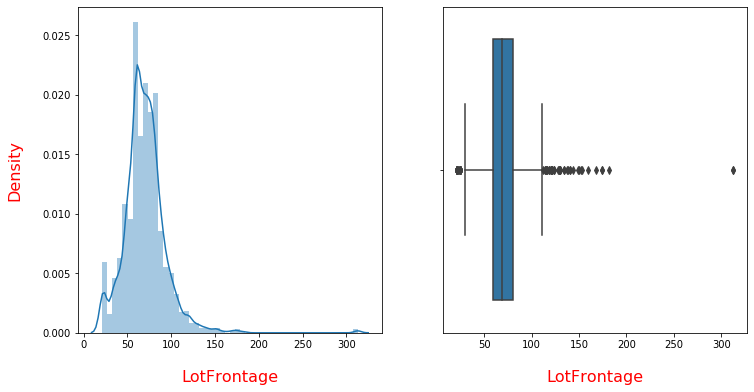

In [187]:
# Calling custom function for distribution plot and box plot of numerical column 'LotFrontage'

plot_func(surprise_housing_df, 'LotFrontage')

#### Inference:

- From the above box plot we can see a presence of `outlier` 
- The distribution plot shows that the data is `right skewed.`
- So imputing the missing values through `median`

In [188]:
# Imputing null values of column 'LotFrontage' with median value of 'LotFrontage' column

surprise_housing_df['LotFrontage']= surprise_housing_df['LotFrontage'].fillna(surprise_housing_df['LotFrontage'].median())

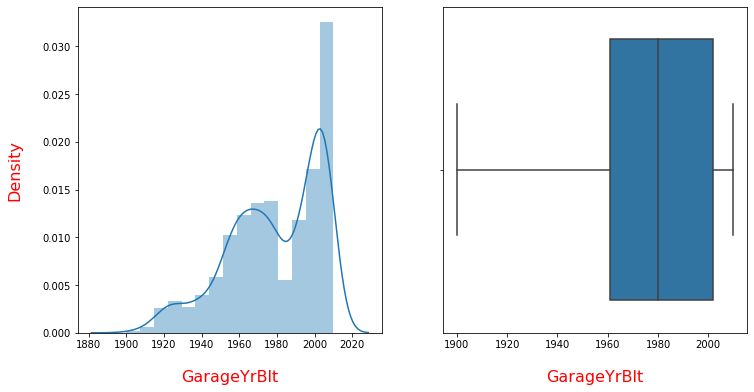

In [189]:
# Calling custom function for distribution plot and box plot of numerical column 'GarageYrBlt'

plot_func(surprise_housing_df, 'GarageYrBlt')

#### Inference:

- The above box plot shows no presence of outlier for the `GarageYrBlt` column
- The distribution plot shows that the data is `not much skewed.`
- Hence, we can use `mean` for imputation

In [190]:
# Imputing null values of column 'GarageYrBlt' with mean value of 'GarageYrBlt' column

surprise_housing_df['GarageYrBlt']= surprise_housing_df['GarageYrBlt'].fillna(surprise_housing_df['GarageYrBlt'].mean())

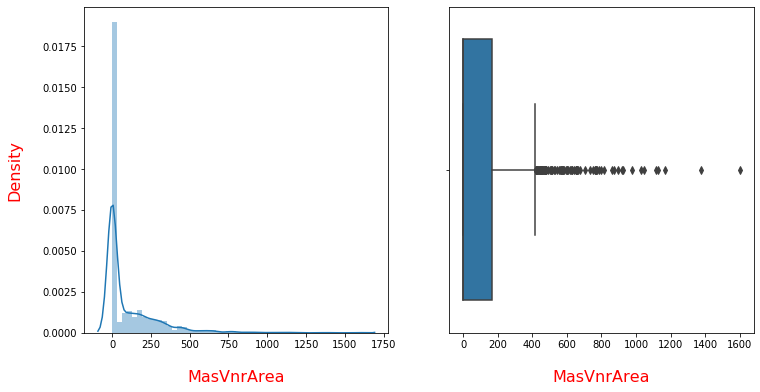

In [191]:
# Calling custom function for distribution plot and box plot of numerical column 'MasVnrArea'

plot_func(surprise_housing_df, 'MasVnrArea')

#### Inference:

- From the above box plot we can see a presence of outlier for column `MasVnrArea`
- The distribution plot shows that the data is `right skewed.`
- So imputing the missing values through `median`

In [192]:
# Imputing null values of column 'MasVnrArea' with median value of 'MasVnrArea' column

surprise_housing_df['MasVnrArea']= surprise_housing_df['MasVnrArea'].fillna(surprise_housing_df['MasVnrArea'].median())

In [193]:
# Numerical null value annalysis after imputation to check

# calculating null value percentage on numerical columns
numerical_null_analysis=round((surprise_housing_df[numerical_col].isnull().sum()/surprise_housing_df.shape[0]*100),2).sort_values(ascending=False)

# checking columns having null value greater than 0 or not
if numerical_null_analysis.isnull().sum()==0.00:
  print('Numerical columns has no null values present')

Numerical columns has no null values present


#### Inference:

- We can see 0 null values present in `numerical columns` after missing value imputation performed

#### Categorical Columns Null Value Treatment:

In [194]:
# Categorical null value annalysis

# calculating null value percentage on Categorical columns
categorical_null_analysis=round((surprise_housing_df[categorical_col].isnull().sum()/surprise_housing_df.shape[0]*100),2).sort_values(ascending=False)

# checking columns having null value greater than 0
categorical_null_analysis[categorical_null_analysis>0.00]

GarageCond      5.55
GarageQual      5.55
GarageFinish    5.55
GarageType      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtCond        2.53
BsmtQual        2.53
BsmtFinType1    2.53
MasVnrType      0.55
Electrical      0.07
dtype: float64

#### Inference:

- There are `11 categorical column` exist in dataset, `having missing values`, which will be either imputed or dropped based on skewness analysis

In [195]:
# Custom function for plotting count plot for categorical columns

def cat_count_visualize(nul_cat_col):

  # Setting the figure size for countplot

  plt.figure(figsize = (26,30))

#ploting the count plot using subplot

  for col in enumerate(nul_cat_columns):
    plt.subplot(3,4,col[0]+1)
    sns.countplot(surprise_housing_df[col[1]], palette = 'Set2')
    
  # Setting axis display zize

    plt.xticks(fontsize=10,rotation=90)
    plt.yticks(fontsize=10)
    
  # Setting axis labels

    plt.ylabel("Count",fontsize = 16, color = 'red', labelpad = 6)
    plt.xlabel(col[1].title(),fontsize = 16, color = 'red', labelpad = 6)
    
# Displaying the plot

  plt.show()

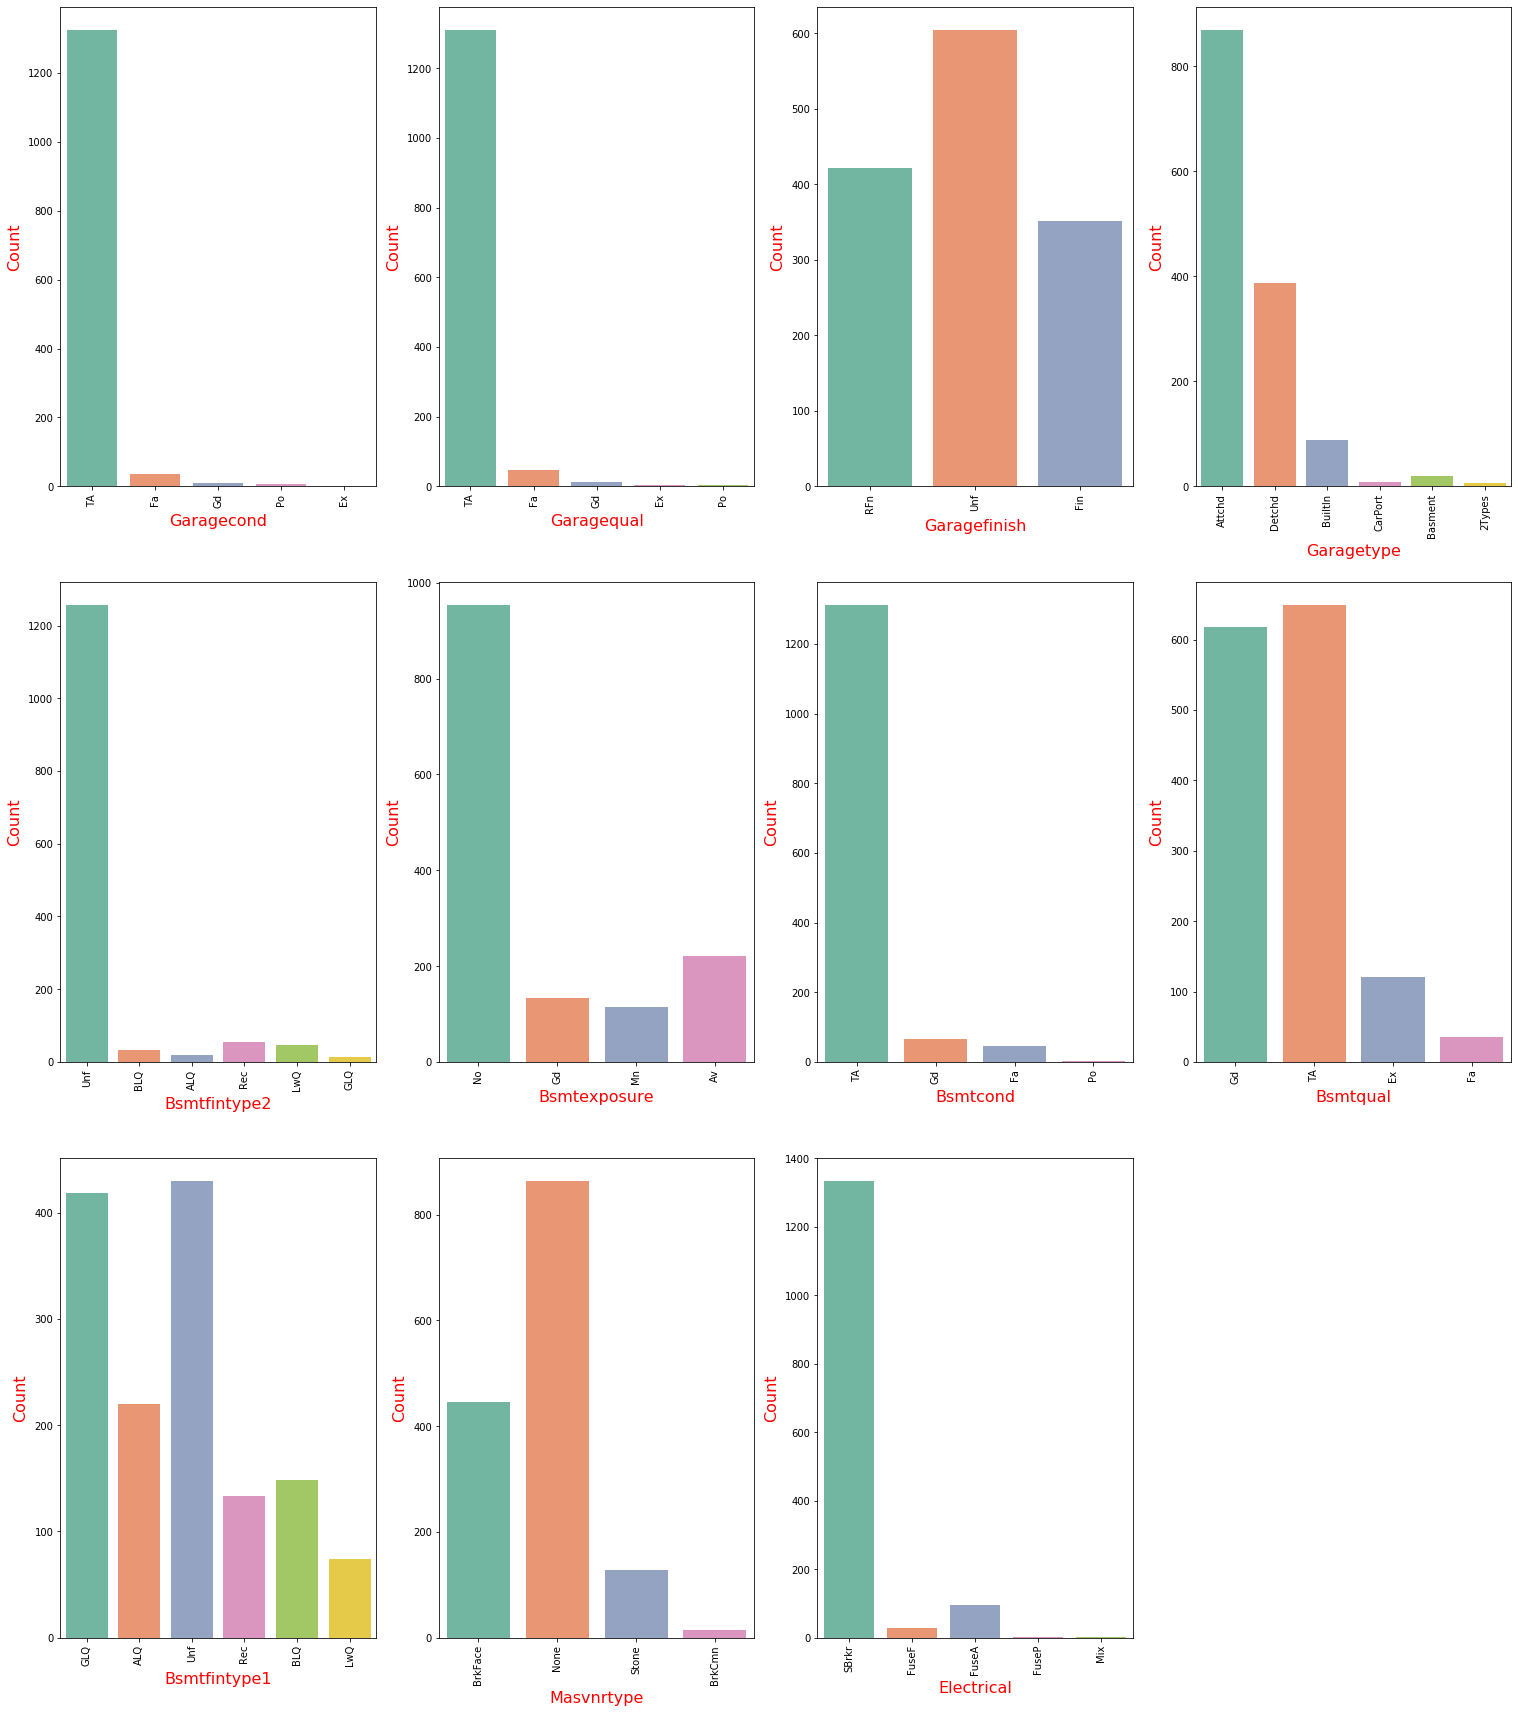

In [196]:
# storing null categorical columns into a variable

nul_cat_columns=categorical_null_analysis[categorical_null_analysis>0.00].index.values

# Calling custom function for count plot of columns that contain null value

cat_count_visualize(nul_cat_columns)

#### Inference:

- From the above plot on categorical columns, we can identify maximum used (mode) values, which will be used for imputation.


- Column `MasVnrType` and `Electrical` are imputed with mode value


- Below columns are having meaningful missing values hence, imputing with new category.
    - `GarageType`, `GarageFinish`, `GarageCond`, `GarageQual` columns are having NA values when the house does not have the garrage. Hence, replacing null with `No Garrage`
    - `BsmtExposure`,`BsmtFinType2`,`BsmtFinType1`,`BsmtCond`,`BsmtQual` columns are having NA when the house does not have the basement. Hence, replacing null with `No Basement`

In [197]:
# Cases when the house doesn't have the garrage so replacing null values with No Garrage

surprise_housing_df['GarageType'] = surprise_housing_df['GarageType'].replace(np.nan, 'No Garage')
surprise_housing_df['GarageFinish'] = surprise_housing_df['GarageFinish'].replace(np.nan, 'No Garage')
surprise_housing_df['GarageCond'] = surprise_housing_df['GarageCond'].replace(np.nan, 'No Garage')
surprise_housing_df['GarageQual'] = surprise_housing_df['GarageQual'].replace(np.nan, 'No Garage')

# replacing MasVnrType,MasVnrType NAN values with the top option of those field

surprise_housing_df['MasVnrType'] = surprise_housing_df['MasVnrType'].fillna(surprise_housing_df['MasVnrType'].mode()) 
surprise_housing_df['Electrical'] = surprise_housing_df['Electrical'].fillna(surprise_housing_df['Electrical'].mode()) 

# Cases when the house doesn't have any basement so replacing null value with No Basement

surprise_housing_df['BsmtExposure'] = surprise_housing_df['BsmtExposure'].replace(np.nan, 'No Basement')
surprise_housing_df['BsmtFinType2'] = surprise_housing_df['BsmtFinType2'].replace(np.nan, 'No Basement')
surprise_housing_df['BsmtFinType1'] = surprise_housing_df['BsmtFinType1'].replace(np.nan, 'No Basement')
surprise_housing_df['BsmtCond'] = surprise_housing_df['BsmtCond'].replace(np.nan, 'No Basement')
surprise_housing_df['BsmtQual'] = surprise_housing_df['BsmtQual'].replace(np.nan, 'No Basement')


In [198]:
# Categorical null value annalysis

# calculating null value percentage on Categorical columns

categorical_null_analysis=round((surprise_housing_df[categorical_col].isnull().sum()/surprise_housing_df.shape[0]*100),2).sort_values(ascending=False)

if categorical_null_analysis.isnull().sum()==0.00:

  print('Categorical columns has no null values present')

Categorical columns has no null values present


- No more `null values` present in categorical columns after imputaion

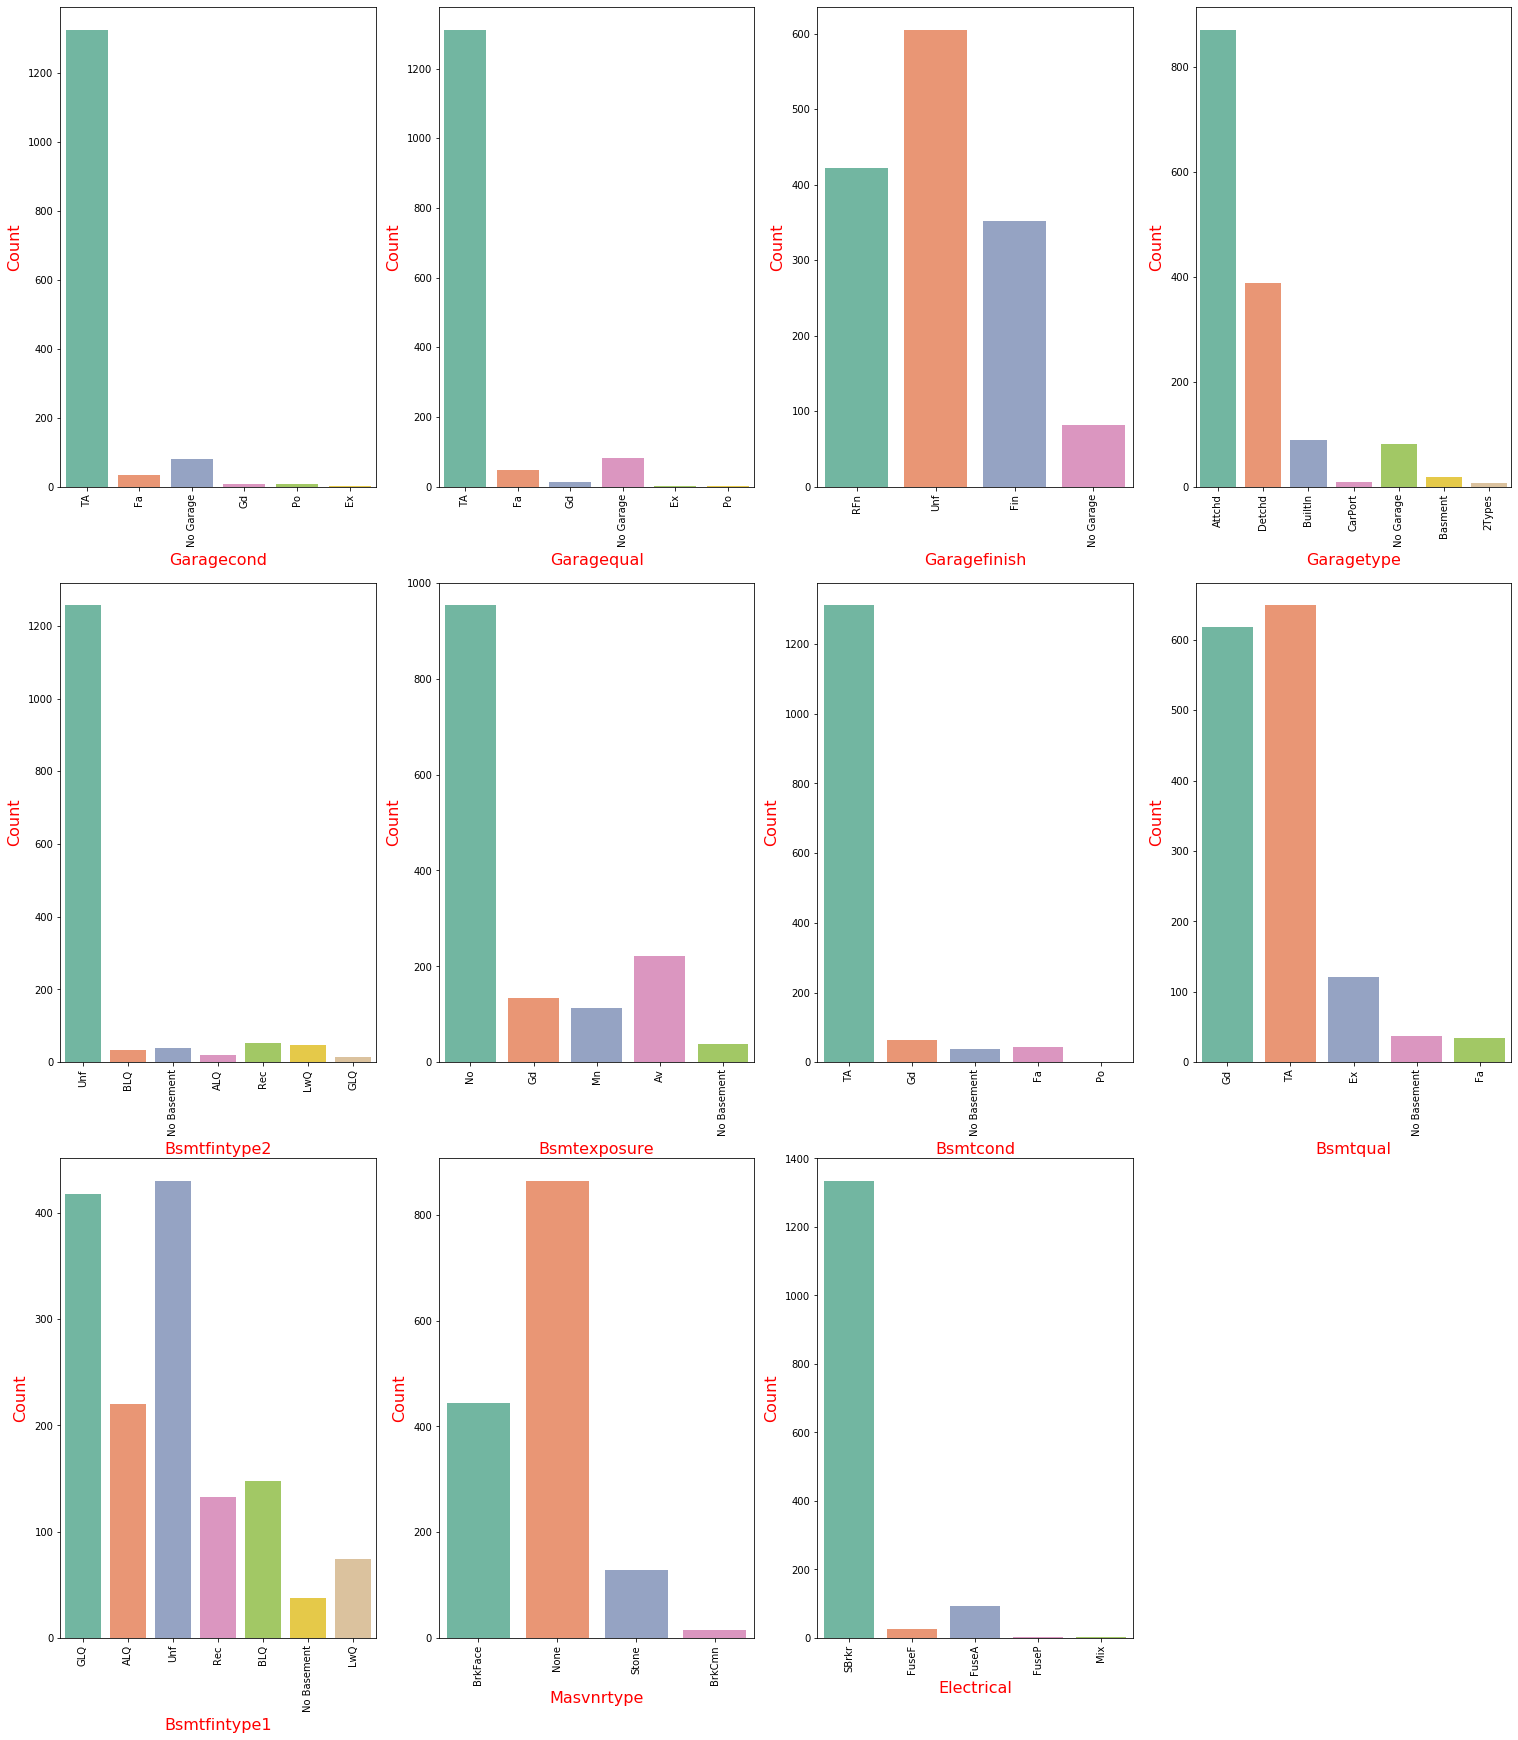

In [199]:

# Calling custom function for count plot of columns that contain null value

cat_count_visualize(nul_cat_columns)

#### Inference:

- From the above plot we can see, new category `No Garrage` has been displayed for columns `GarageType`, `GarageFinish`, `GarageCond`, `GarageQual` 


- Similarly, new category `No Basement` has been displayed for columns `BsmtExposure`,`BsmtFinType2`,
`BsmtFinType1`,`BsmtCond`,`BsmtQual`

### Numerical to categorical conversion

In [200]:
# Changing numerical to categorical so as to form these as dummy variables later 

# Using map function to convert the numerical to categorical values for column MSSubClass

surprise_housing_df['MSSubClass']=surprise_housing_df['MSSubClass'].map({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

# Using map function to convert the numerical to categorical values for column OverallQual

surprise_housing_df['OverallQual']=surprise_housing_df['OverallQual'].map({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

# Using map function to convert the numerical to categorical values for column OverallCond

surprise_housing_df['OverallCond']=surprise_housing_df['OverallCond'].map({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [201]:
# Checking the first 5 row of the dataset

surprise_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [202]:
# Checking the  rows and columns of the data frame

surprise_housing_df.shape

(1460, 76)

In [203]:
# Fetching the categorical columns

Categorical_cols = surprise_housing_df.select_dtypes(include=['object'])

# Showing the categorical columns

print(Categorical_cols.columns.values)

['MSSubClass' 'MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'OverallQual' 'OverallCond' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'ExterQual'
 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' 'KitchenQual' 'Functional' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType' 'SaleCondition']


#### Inference:

- From above, we can see datatype of columns `MSSubClass`, `OverallQual` and `OverallCond` have been converted into `object`

## Univariate Analysis - Categorical Variables

In [204]:
# Custom function for plotting univariate analysis for categorical columns

def cat_univariate_visualize(cat_col_list):

  # Setting the figure size for countplot

  plt.figure(figsize = (22,22))

# ploting the count plot using subplot

  for col_cat in enumerate(cat_col_list):
    plt.subplot(2,3,col_cat[0]+1)
    sns.countplot(surprise_housing_df[col_cat[1]], palette = 'Set2')
    
  # Setting axis display zize

    plt.xticks(fontsize=10,rotation=90)
    plt.yticks(fontsize=10)
    
  # Setting axis labels

    plt.ylabel("Count",fontsize = 15, color = 'red', labelpad = 10)
    plt.xlabel(col_cat[1].title(),fontsize = 15, color = 'red', labelpad = 5)
    
# Displaying the plot 

  plt.show()

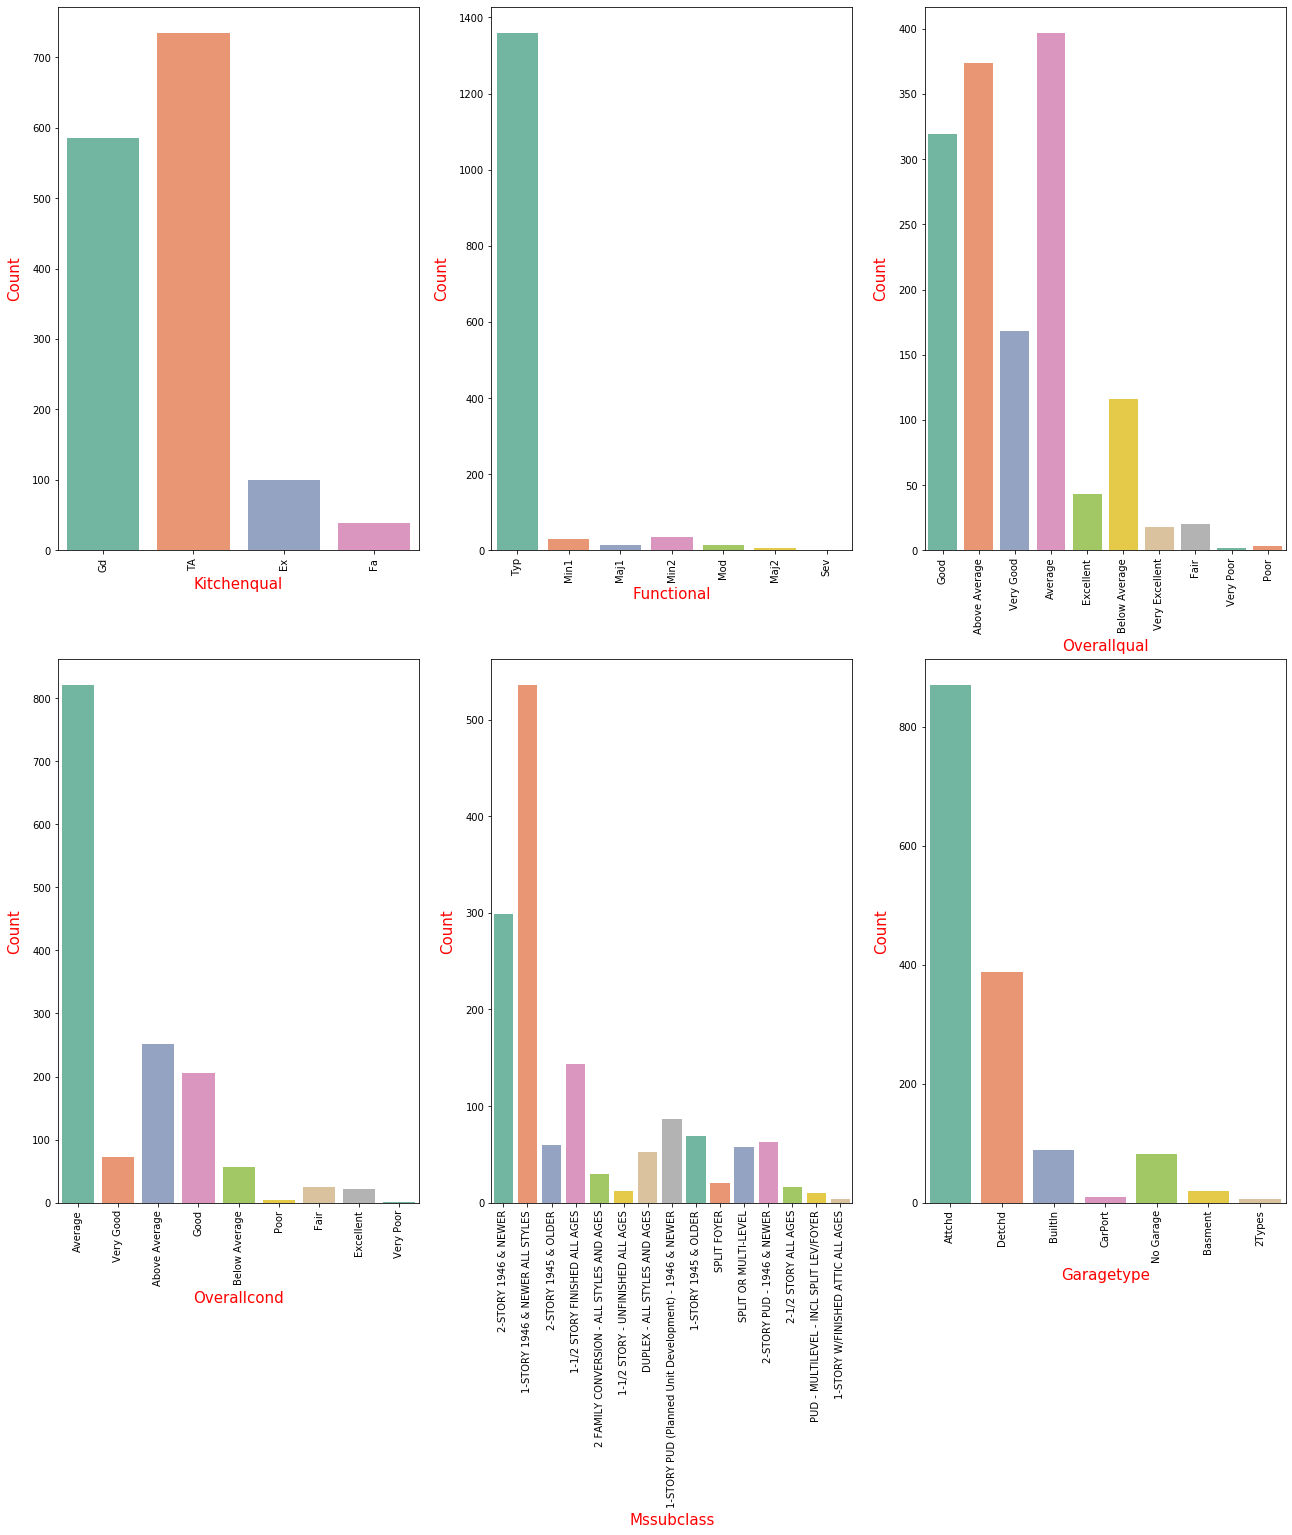

In [205]:
# Making a list for 6 categorical columns for univariate analysis

col1_cat_list=['KitchenQual','Functional','OverallQual','OverallCond','MSSubClass','GarageType']

# Calling the custom function for univariate analysis

cat_univariate_visualize(col1_cat_list)


#### Inference:

- From the above count plot, we can see column `Functional` is `highly skewed`. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping this column

- We can also see that `GarageType` column is having very low count for `Basment`, `CarPort`, `2Types`  categories. Hence, grouping them into a new category `Others`

In [206]:
# Dropping highly skewed column Functional

drop_cols(surprise_housing_df,['Functional'])

In [207]:
# Replacing the column GarageType values for 'Basment','CarPort','2Types' to new category 'Others'

surprise_housing_df['GarageType'] = surprise_housing_df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')

# checking the values count to check the each values of column GarageType after replacement

surprise_housing_df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Others        34
Name: GarageType, dtype: int64

#### Inference:

- Above value count shows new category `Others` has been addedd in column `GarageType` and `Basment`, `CarPort`, `2Types` etc. categories are no more exist

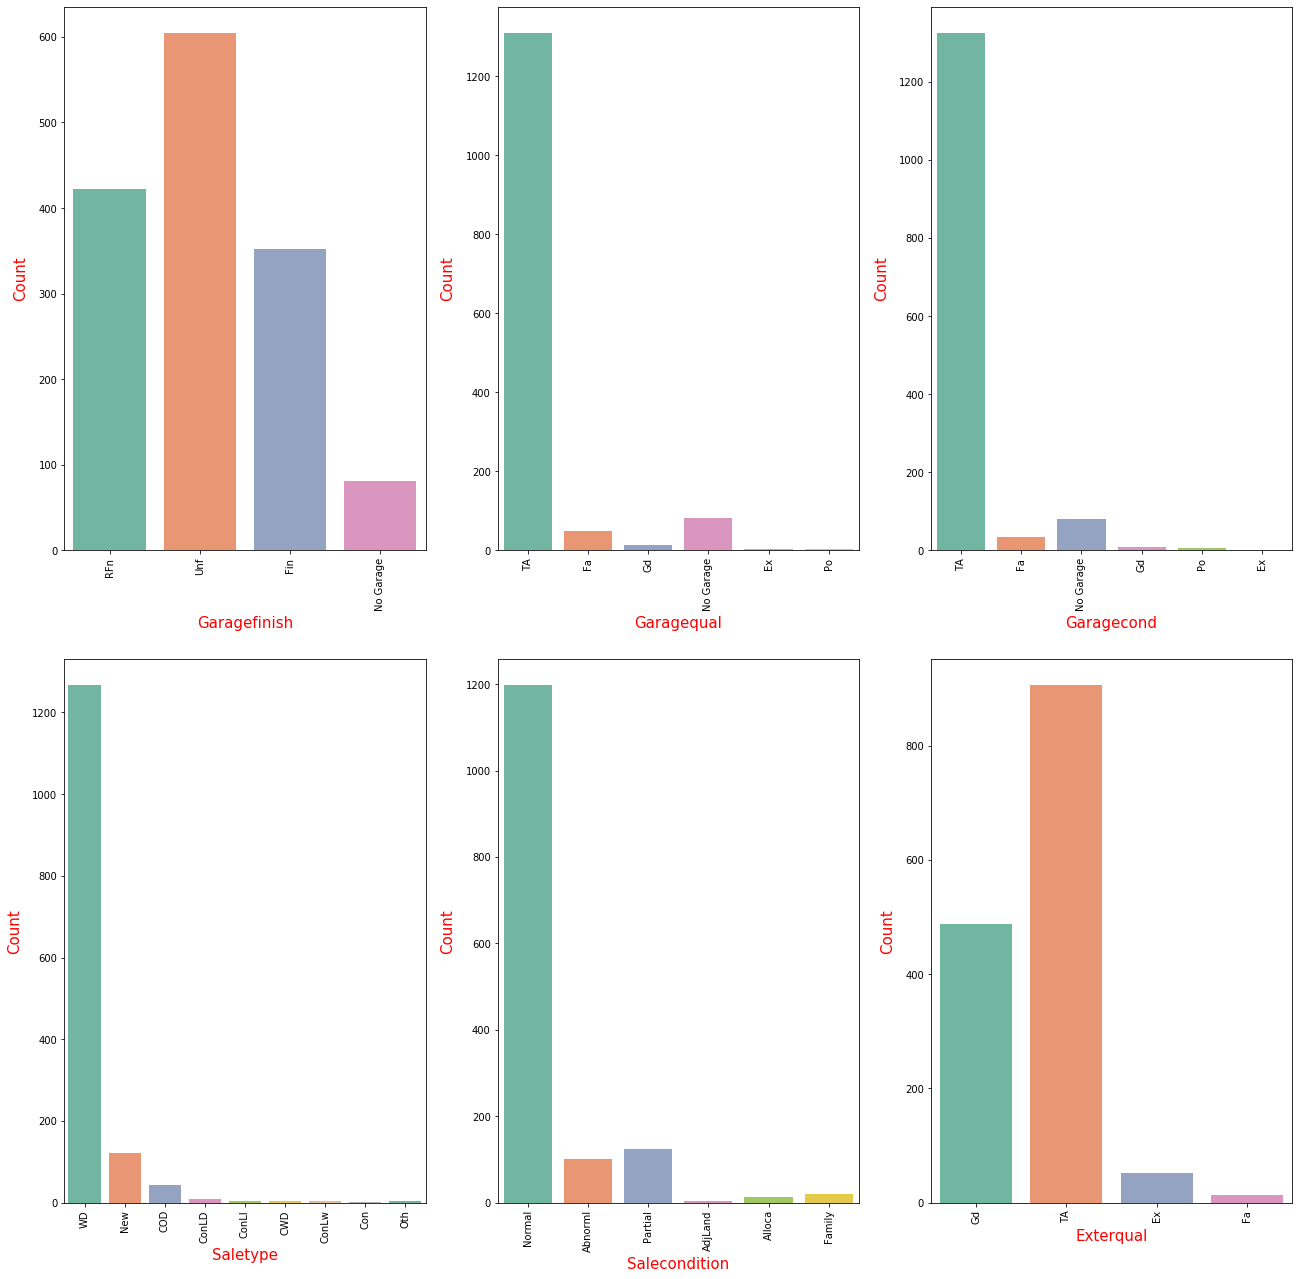

In [208]:
# Making a list for 6 categorical columns for univariate analysis

col2_cat_list=['GarageFinish','GarageQual','GarageCond','SaleType','SaleCondition','ExterQual']

# Calling the custom function for univariate analysis

cat_univariate_visualize(col2_cat_list)

#### Inference:

- From the above count plot, we can see columns `GarageQual`,`GarageCond` and `SaleType` are `highly skewed`. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns.

- We can also see that `SaleCondition` column is having very low count for `Family`,`Alloca`,`AdjLand`  categories. Hence, grouping them into a new category `Others`

In [209]:
# Replacing the column SaleCondition values for 'Family','Alloca','AdjLand' to new category 'Others'

surprise_housing_df['SaleCondition'] = surprise_housing_df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

# checking the values count to check the each values of column SaleCondition after replacement

surprise_housing_df['SaleCondition'].value_counts()


Normal     1198
Partial     125
Abnorml     101
Others       36
Name: SaleCondition, dtype: int64

#### Inference:

- Above value count shows new category `Others` has been addedd in column `SaleCondition` and `Family`,`Alloca`,`AdjLand` etc. categories are no more exist

In [210]:
# Dropping highly skewed columns 'GarageQual','GarageCond','SaleType'

drop_cols(surprise_housing_df,['GarageQual','GarageCond','SaleType'])

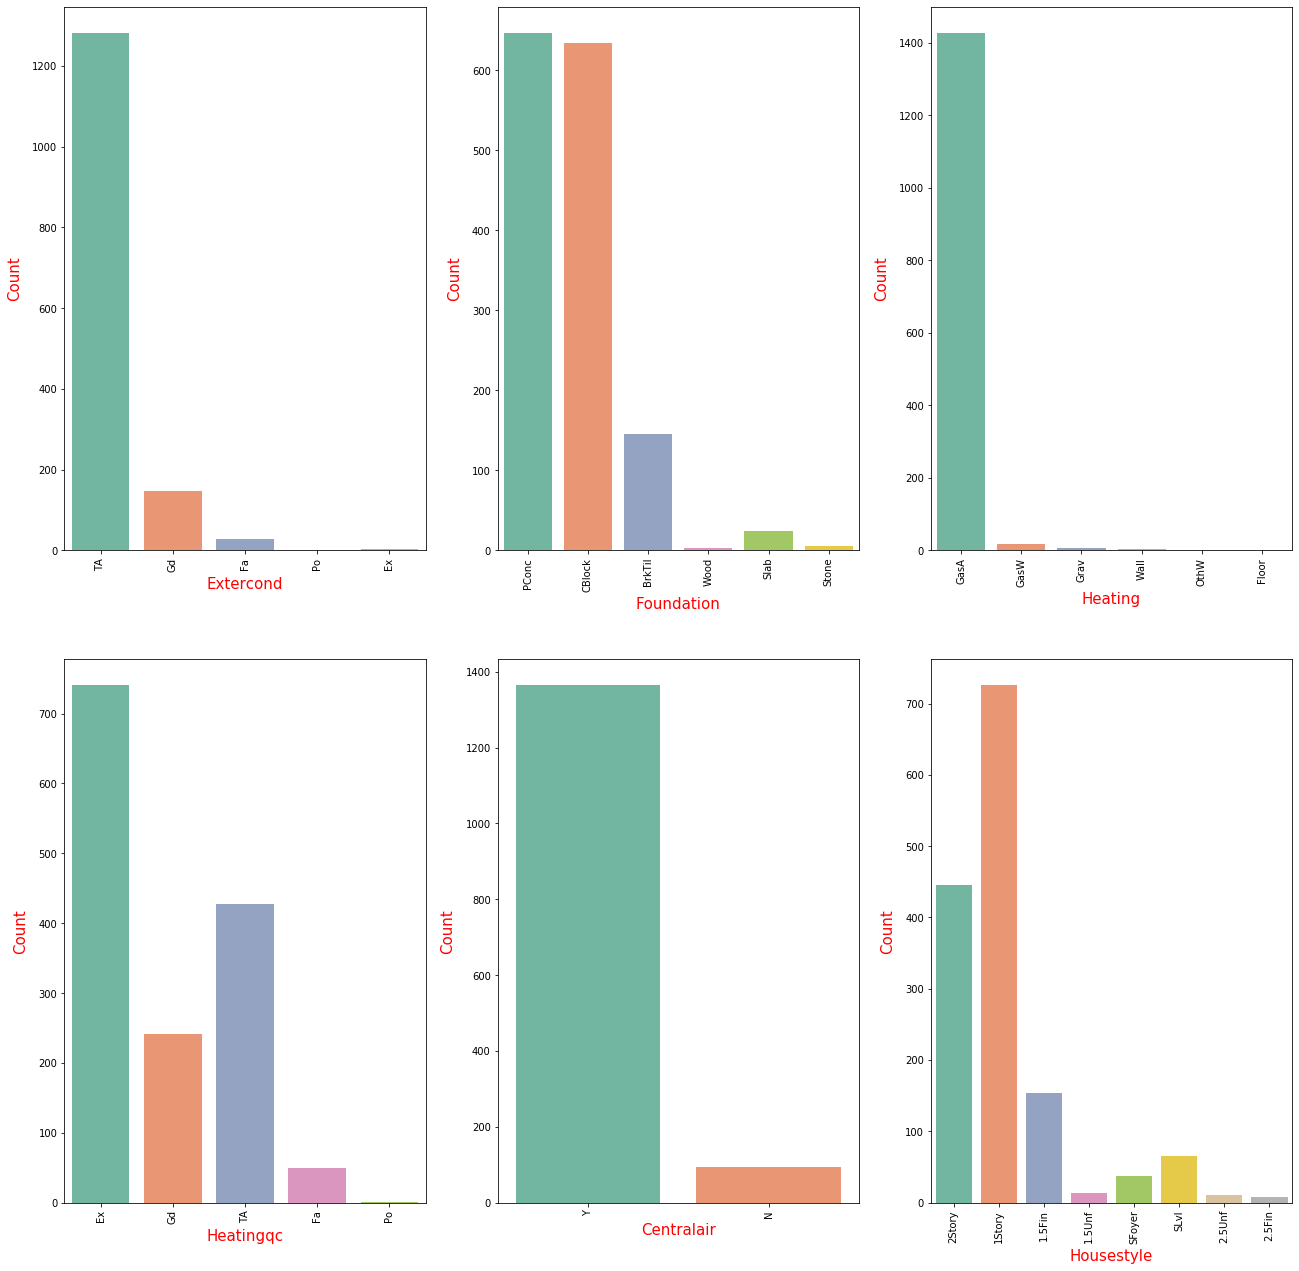

In [211]:
# Making a list for 6 categorical columns for univariate analysis

col3_cat_list=['ExterCond','Foundation','Heating','HeatingQC','CentralAir','HouseStyle']

# Calling the custom function for univariate analysis

cat_univariate_visualize(col3_cat_list)

#### Inference:

- From the above count plot, we can see columns `CentralAir`,`Heating` and `ExterCond` are `highly skewed`. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns


- We can also see that `Foundation` column is having very low count for `Slab`,`Stone`,`Wood` categories. Hence, grouping them into a new category `Others`

In [212]:
# Replacing the column Foundation values for 'Slab','Stone','Wood' to new category 'Others'

surprise_housing_df['Foundation'] = surprise_housing_df['Foundation'].replace(['Slab','Stone','Wood'],'Others')

# checking the values count to check the each values of column Foundation after replacement

surprise_housing_df['Foundation'] .value_counts()

PConc     647
CBlock    634
BrkTil    146
Others     33
Name: Foundation, dtype: int64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `Foundation` and `Slab`,`Stone`,`Wood` etc. categories are no more exist

In [213]:
# Replacing the column HouseStyle values for 'SFoyer','1.5Unf','2.5Unf','2.5Fin' to new category 'Others'

surprise_housing_df['HouseStyle'] = surprise_housing_df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

# checking the values count to check the each values of column HouseStyle after replacement

surprise_housing_df['HouseStyle'] .value_counts()


1Story    726
2Story    445
1.5Fin    154
Others     70
SLvl       65
Name: HouseStyle, dtype: int64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `HouseStyle` and `SFoyer`,`1.5Unf`,`2.5Unf`,`2.5Fin` etc. categories are no more exist

In [214]:
# Dropping highly skewed columns 'CentralAir','Heating','ExterCond'

drop_cols(surprise_housing_df,['CentralAir','Heating','ExterCond'])


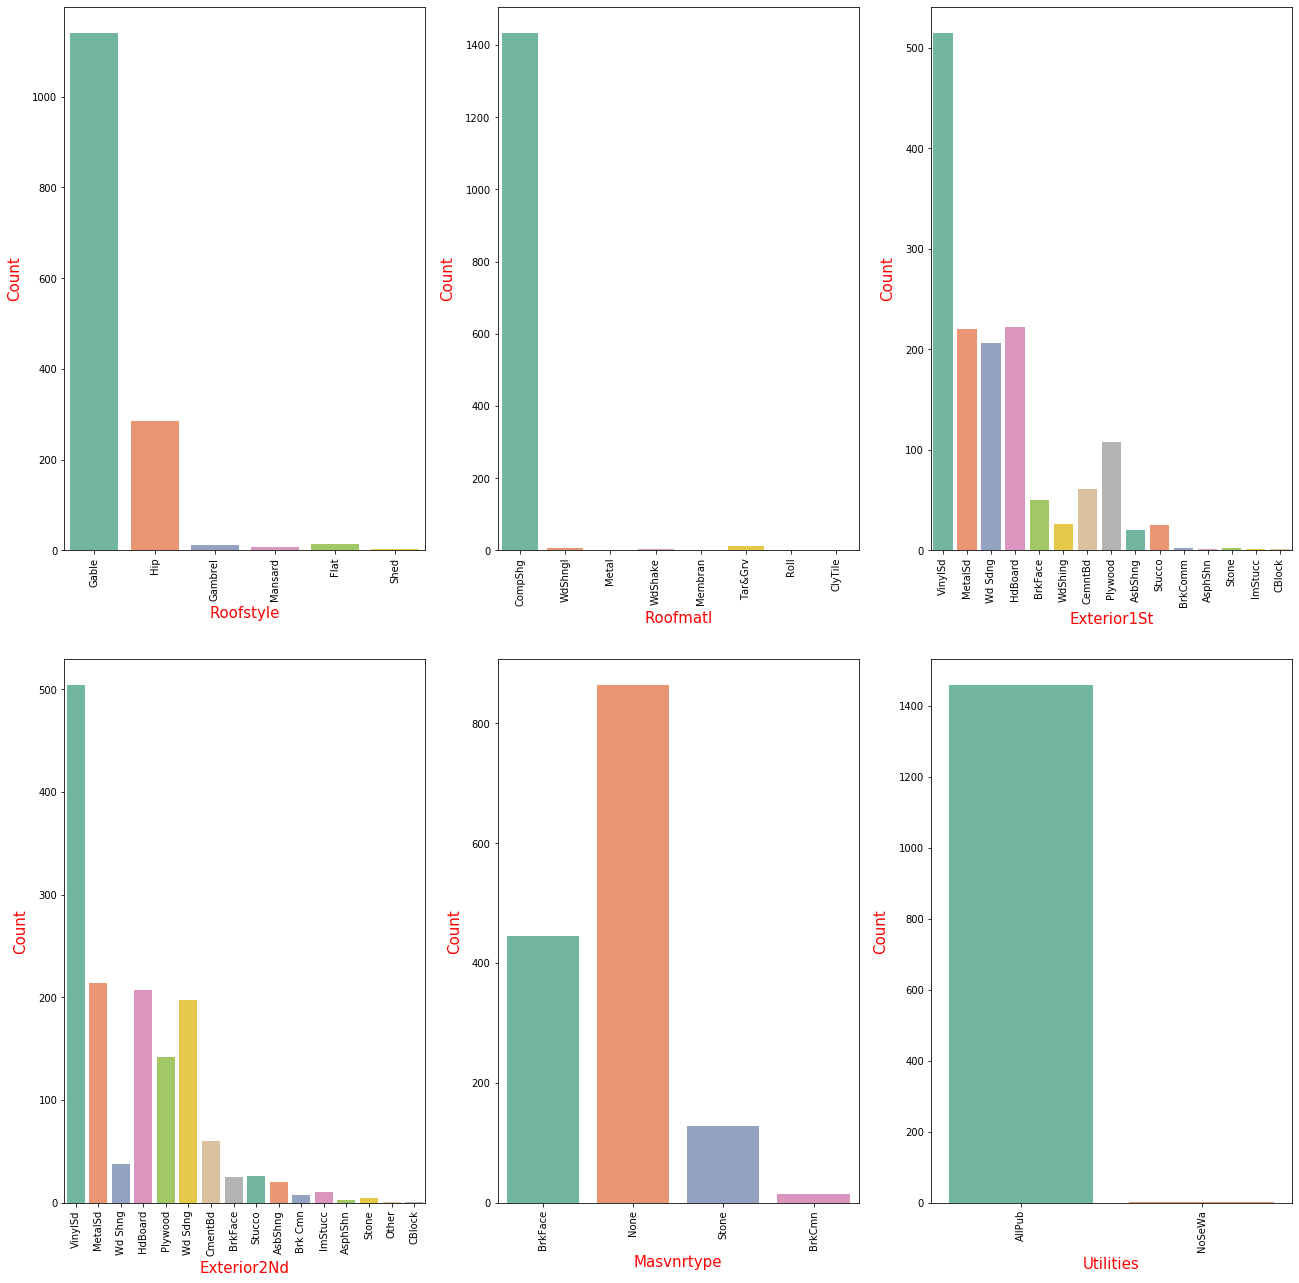

In [215]:
# Making a list for 6 categorical columns for univariate analysis

col4_cat_list=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Utilities']

# Calling the custom function for univariate analysis

cat_univariate_visualize(col4_cat_list)

#### Inference:


- From the above count plot, we can see columns `RoofMatl` and `Utilities` are `highly skewed`. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns


- We can also see that `RoofStyle` column is having very low count for `Shed`,`Mansard`,`Gambrel`,`Flat` categories. Hence, grouping them into a new category `Others`


- We can also see that `Exterior1st` column is having very low count for `AsphShn`, `ImStucc`, `CBlock`, `Stone`, `BrkComm`, `AsbShng`,`Stucco`,`WdShing` categories. Hence, grouping them into a new category `Others`.


- We can also see that `Exterior2nd` column is having very low count for `Other`,`AsphShn`,`ImStucc`,`CBlock`,`Stone`,`Brk Cmn`,`AsbShng`,`Stucco`,`BrkFace` categories. Hence, grouping them into a new category `Others`

In [216]:
# Replacing the column RoofStyle values for 'Shed','Mansard','Gambrel','Flat' to new category 'Others'

surprise_housing_df['RoofStyle'] = surprise_housing_df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')

# Replacing the column Exterior1st values for 'AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing' to new category 'Others'

surprise_housing_df['Exterior1st'] = surprise_housing_df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')

# Replacing the column Exterior2nd values for 'Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace' to new category 'Others'

surprise_housing_df['Exterior2nd'] = surprise_housing_df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','Brk Cmn','AsbShng','Stucco','BrkFace'],'Others')


In [217]:

# checking the values count to check the each values of column RoofStyle after replacement

surprise_housing_df['RoofStyle'] .value_counts()


Gable     1141
Hip        286
Others      33
Name: RoofStyle, dtype: int64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `RoofStyle` and `Shed`,`Mansard`,`Gambrel`,`Flat` etc. categories are no more exist

In [218]:
# checking the values count to check the each values of column Exterior1st after replacement

surprise_housing_df['Exterior1st'] .value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
Others      78
CemntBd     61
BrkFace     50
Name: Exterior1st, dtype: int64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `Exterior1st` 
- `AsphShn`,`ImStucc`,`CBlock`,`Stone`,`BrkComm`,`AsbShng`,`Stucco`,`WdShing` etc. categories are no more exist

In [219]:
# checking the values count to check the each values of column Exterior2nd after replacement

surprise_housing_df['Exterior2nd'] .value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
Others      98
CmentBd     60
Wd Shng     38
Name: Exterior2nd, dtype: int64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `Exterior2nd` 

- `Other`,`AsphShn`,`ImStucc`,`CBlock`,`Stone`,`Brk Cmn`,`AsbShng`,`Stucco`,`BrkFace` etc. categories are no more exist

In [220]:
# Dropping highly skewed columns RoofMatl

drop_cols(surprise_housing_df,['RoofMatl','Utilities'])

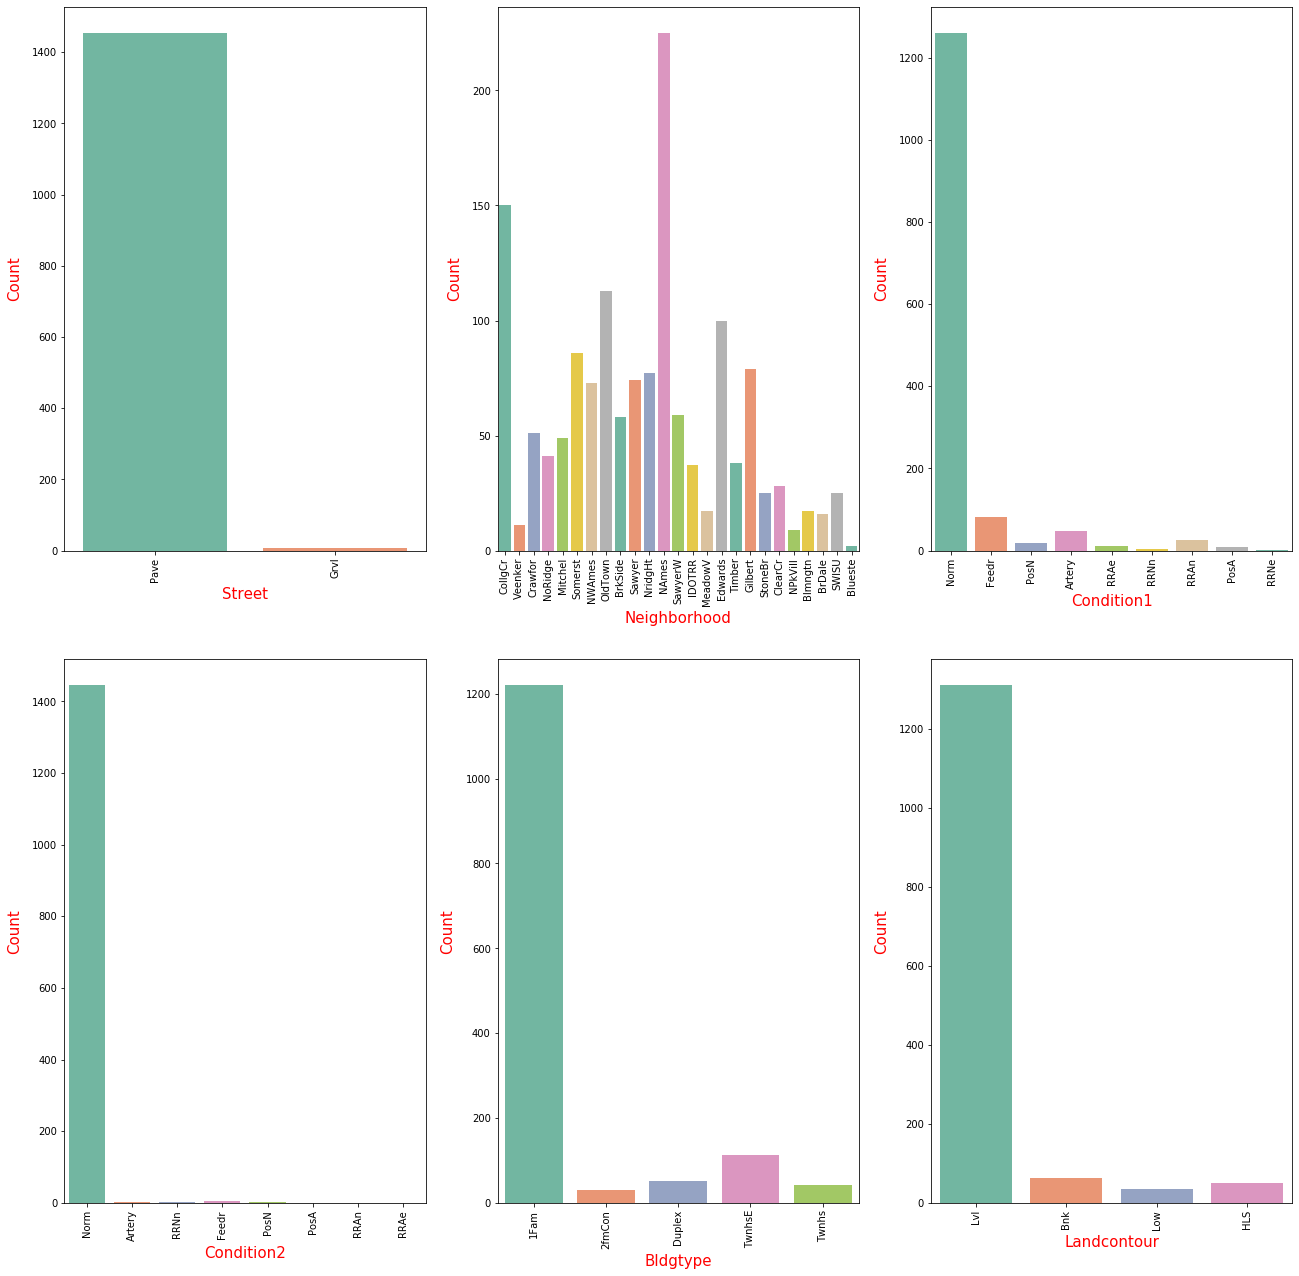

In [221]:
# Making a list for 6 categorical columns for univariate analysis

col5_cat_list=['Street','Neighborhood','Condition1','Condition2','BldgType','LandContour']

# Calling the custom function for univariate analysis

cat_univariate_visualize(col5_cat_list)

#### Inference:


- From the above count plot, we can see columns `LandContour`,`Street`,`Condition1` & `Condition2` are `highly skewed`. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns.

In [222]:
# Dropping highly skewed columns 'Street','Condition1','Condition2','LandContour'

drop_cols(surprise_housing_df,['Street','Condition1','Condition2','LandContour'])

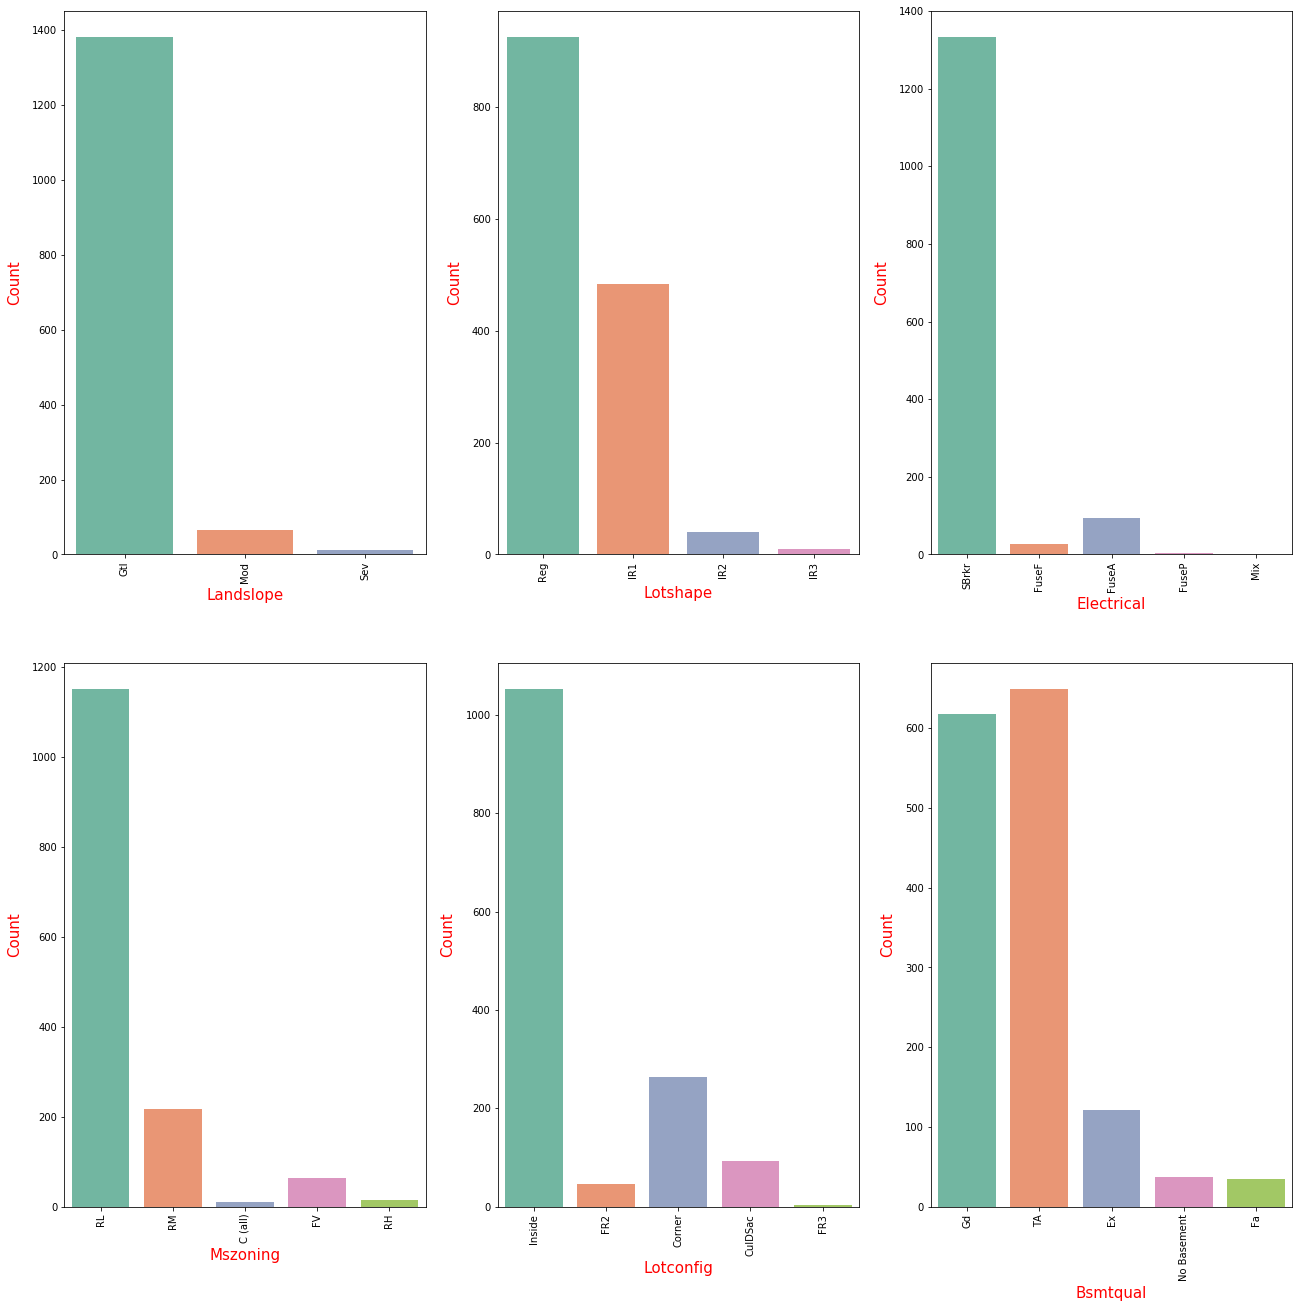

In [223]:
# Making a list for 6 categorical columns for univariate analysis

col6_cat_list=['LandSlope','LotShape','Electrical','MSZoning','LotConfig','BsmtQual']

# Calling the custom function for univariate analysis

cat_univariate_visualize(col6_cat_list)

#### Inference:


- From the above count plot, we can see columns `LandSlope` and `Electrical` are `highly skewed`. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns


- We can also see that `MSZoning` column is having very low count for `RH`,`C (all)` categories. Hence, grouping them into a new category `Others`

In [224]:
# Replacing the column MSZoning values for 'RH','C (all)' to new category 'Others'

surprise_housing_df['MSZoning'] = surprise_housing_df['MSZoning'].replace(['RH','C (all)'],'Others')

# checking the values count to check the each values of column Exterior2nd after replacement

surprise_housing_df['MSZoning'] .value_counts()

RL        1151
RM         218
FV          65
Others      26
Name: MSZoning, dtype: int64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `MSZoning` and `RH`,`C (all)` etc. categories are no more exist

In [225]:
# Dropping highly skewed columns 'LandSlope','Electrical'

drop_cols(surprise_housing_df,['LandSlope','Electrical'])


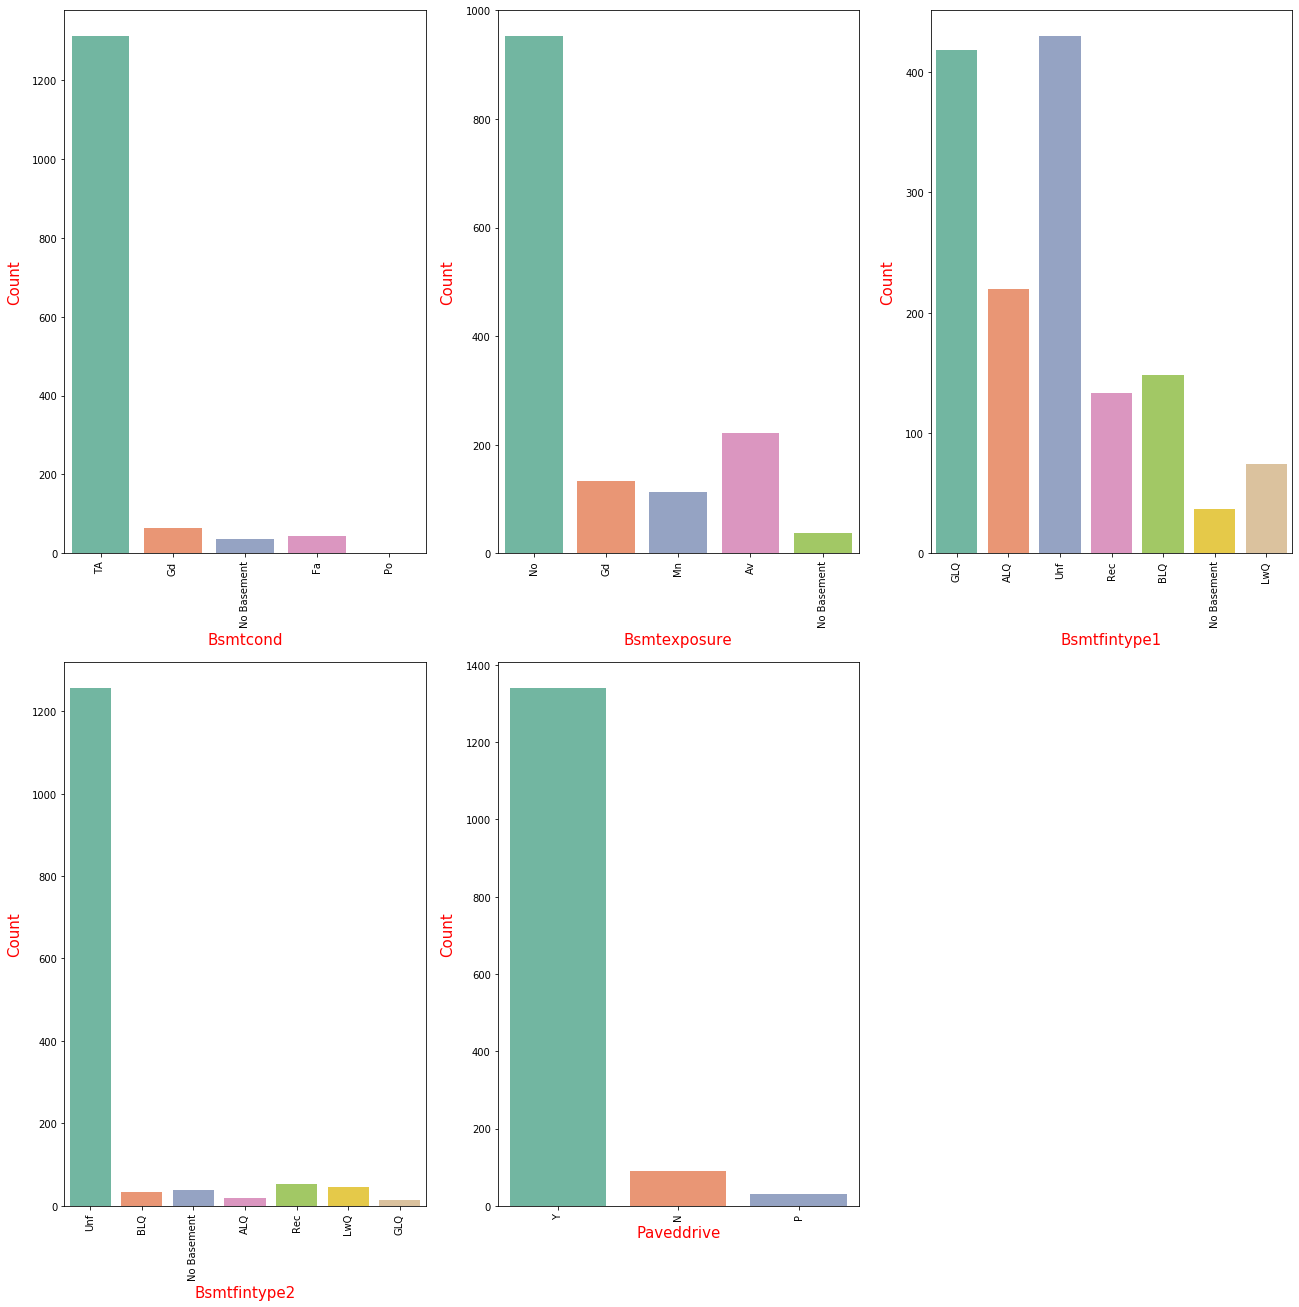

In [226]:
# Making a list for 5 categorical columns for univariate analysis

col7_cat_list=['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','PavedDrive']

# Calling the custom function for univariate analysis

cat_univariate_visualize(col7_cat_list)

#### Inference:


- From the above count plot, we can see columns `BsmtFinType2`,`PavedDrive` & `BsmtCond` are `highly skewed`. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns

In [227]:
# Dropping highly skewed columns 'BsmtFinType2','PavedDrive','BsmtCond'

drop_cols(surprise_housing_df,['BsmtFinType2','PavedDrive','BsmtCond'])

In [228]:
# Checking the rows and columns of the dataframe

surprise_housing_df.shape

(1460, 58)

#### Inference:

- After `dropping all skewed categorical column`, we are having `58 columns` in our dataset

### Derived Variable creation

- Create new variable to store age of building using `YearBuild` column and dropping the original.


- Dropping below year related columns as there is no further use of these column in price prediction
    - `YearRemodAdd`
    - `GarageYrBlt`
    - `YrSold`
    - `MoSold`
    
    
- Also dropping `Id` column as it is not useful for prediction

In [229]:
# extracting curent year from a date

current_year=(date.today()).year

# Adding a new column as AgeOfHouse and calculating it from YearBuilt

surprise_housing_df['AgeOfHouse']=current_year-surprise_housing_df['YearBuilt']

In [230]:
# dropping original YearBuilt columns along with other 'YearRemodAdd','GarageYrBlt','YrSold' ,'MoSold' columns as those are not important for prediction

drop_cols(surprise_housing_df,['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'])


In [231]:
# dropping Id column as it is not important for prediction

drop_cols(surprise_housing_df,['Id'])

In [232]:
# Checking the rows and columns of the dataframe

surprise_housing_df.shape

(1460, 53)

#### Inference:

- After dropping date/year columns, we are having 53 columns in our dataset

In [233]:
# Checking the first 5 rows of the dataframe

surprise_housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,AgeOfHouse
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,Normal,208500,18
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,Normal,181500,45
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,Normal,223500,20
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,Abnorml,140000,106
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,Normal,250000,21


## Bivariate Analysis

### Nummerical vs. Nummerical Variables

In [234]:
# Custom function for plotting bivariate analysis for numerical columns and finding pattern of target variable

def Num_Num_bivariate_visualize(Num_col_list):

  # Setting the figure size for scatterplot

  plt.figure(figsize = (18,16))

# ploting the scatter plot using subplot

  for col_num in enumerate(Num_col_list):
    plt.subplot(2,2,col_num[0]+1)
    sns.scatterplot(surprise_housing_df[col_num[1]],surprise_housing_df['SalePrice'])
    
  # Setting axis display zize

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
  # Setting axis labels

    plt.ylabel("SalePrice",fontsize = 15, color = 'red', labelpad = 12)
    plt.xlabel(col_num[1].title(),fontsize = 15, color = 'red', labelpad = 12)
    
# Displaying the plot

  plt.show()

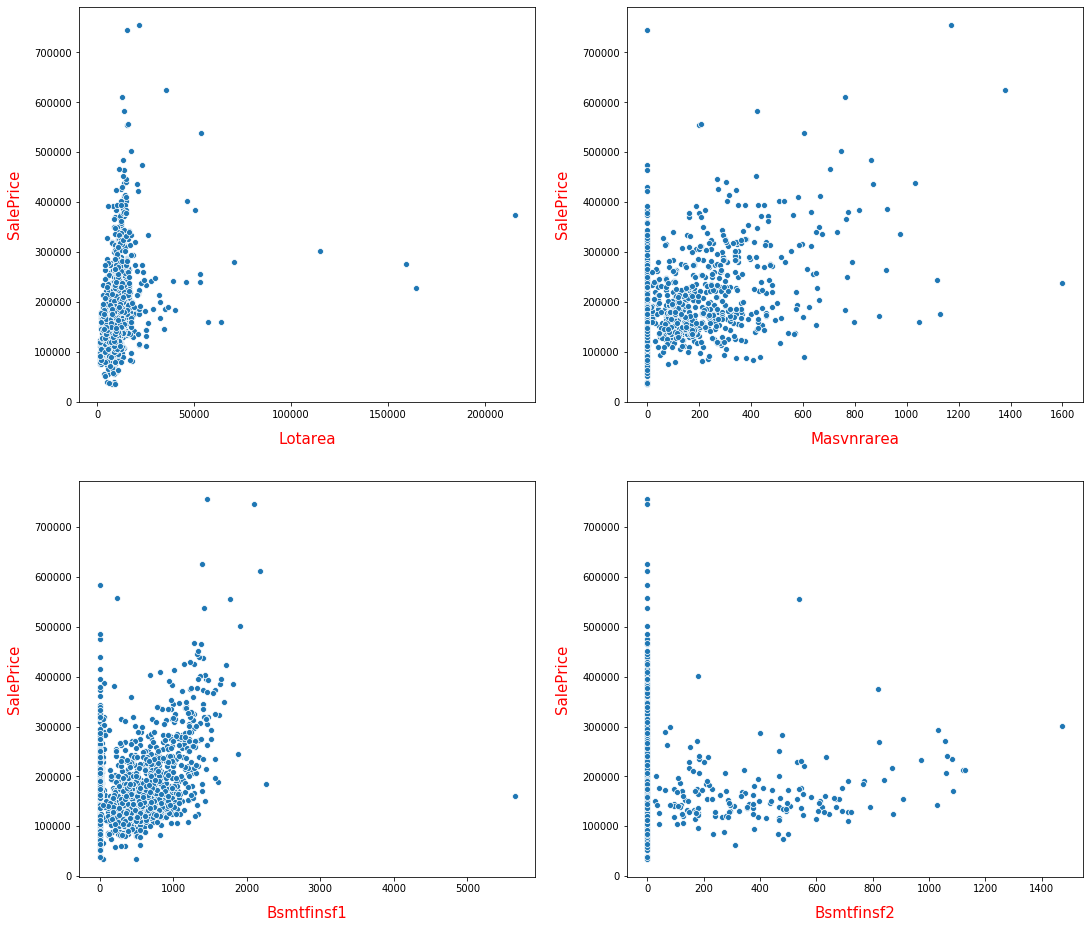

In [235]:
# extracting the list of 4 numerical variables 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2'

col1_num_list=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2']

# Calling custom function to see the scatter plot and find the effect on target variable

Num_Num_bivariate_visualize(col1_num_list)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `Masonry veneer area (in square feet)` and  `Type 2 finished (in square feet)`, where as the relation is `not so linear` with `Type 1 finished (in square feet)` and `Lot size (in square feet)`

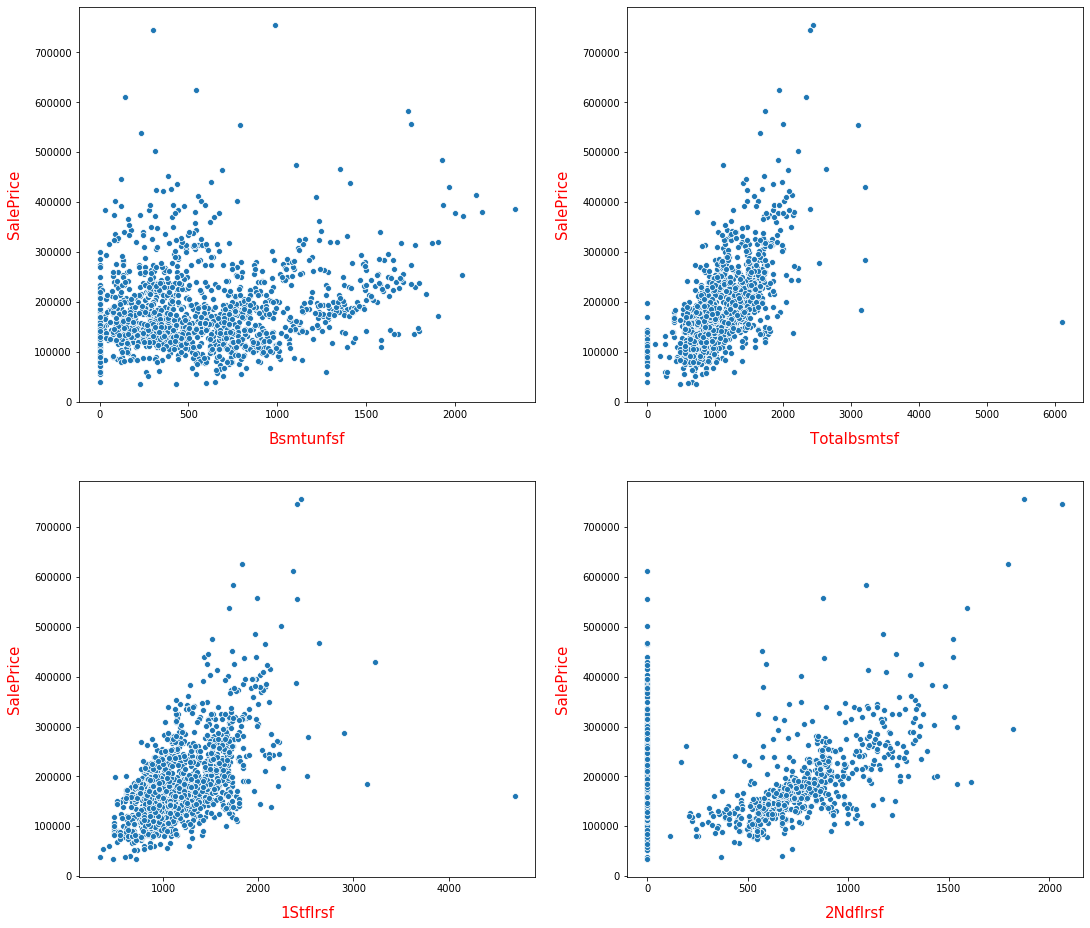

In [236]:
# extracting the list of 4 numerical variables 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF'

col2_num_list=['BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']

# Calling custom function to see the scatter plot and find the effect on target variable

Num_Num_bivariate_visualize(col2_num_list)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `Unfinished square feet of basement area` ,`Total square feet of basement area`, `First Floor square feet` and `Second floor square feet`

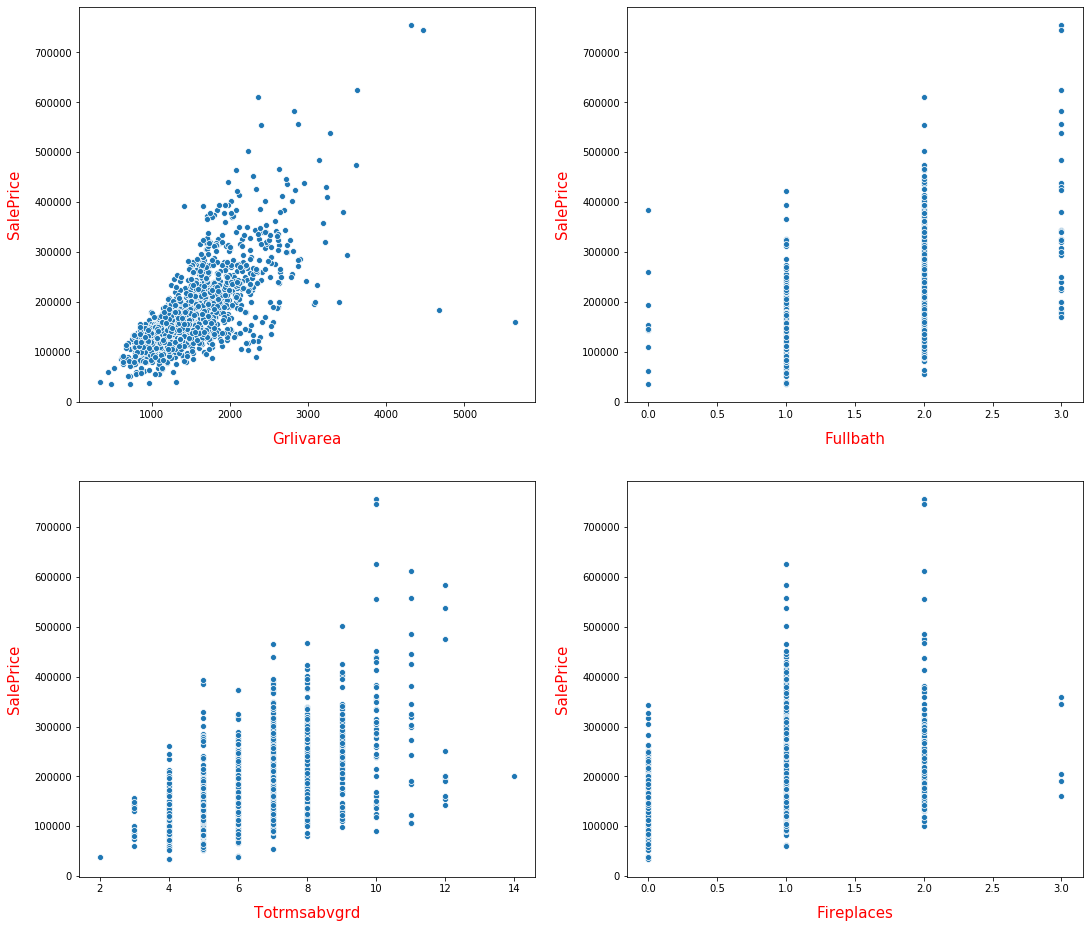

In [237]:
# extracting the list of 4 numerical variables 'GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces'

col3_num_list=['GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces']

# Calling custom function to see the scatter plot and find the effect on target variable

Num_Num_bivariate_visualize(col3_num_list)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `ground) living area square feet`, where as the relation is `not so linear` with `Full bathrooms above grade`, `Total rooms above grade (does not include bathrooms)` and `Number of fireplaces`

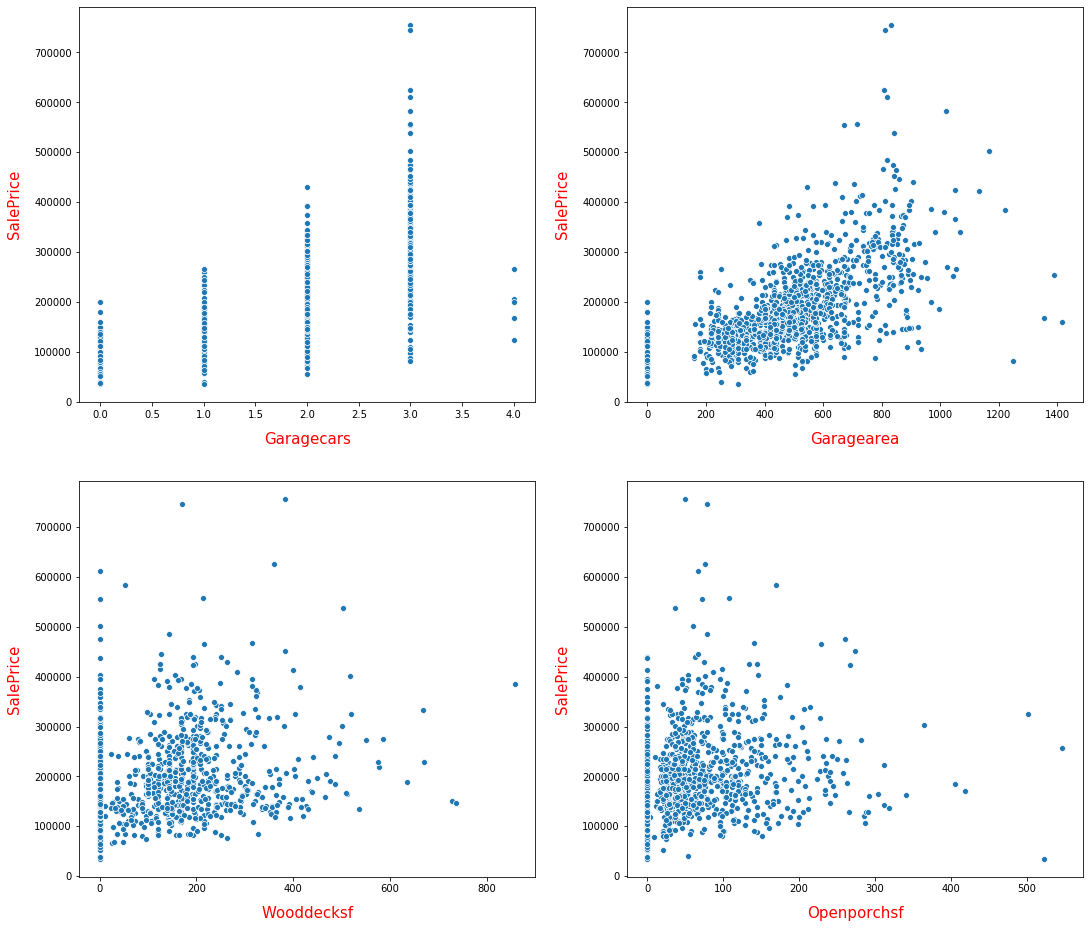

In [238]:
# extracting the list of 4 numerical variables 'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF'

col4_num_list=['GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']

# Calling custom function to see the scatter plot and find the effect on target variable

Num_Num_bivariate_visualize(col4_num_list)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `Size of garage in square feet`, `Wood deck area in square feet` and  `Open porch area in square feet`, where as the relation is `not so linear` with `Size of garage in car capacity`

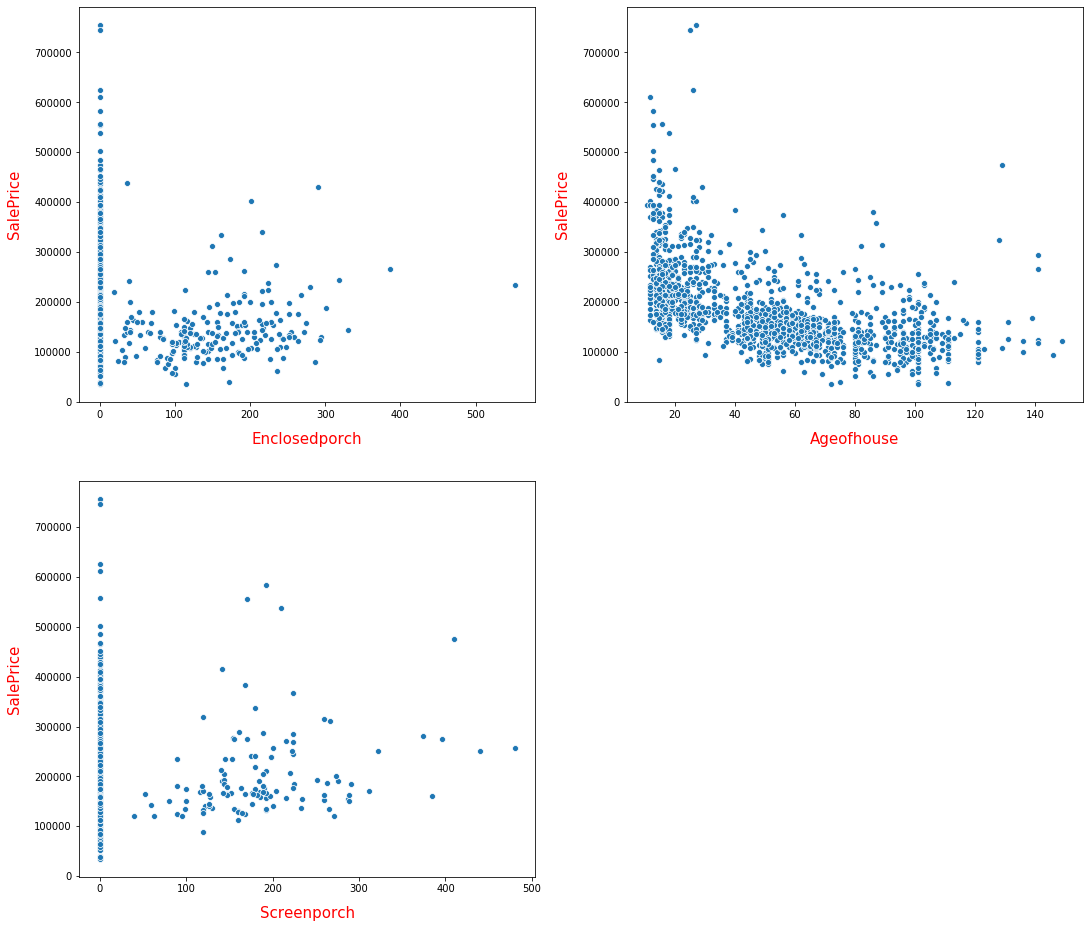

In [239]:
# extracting the list of 4 numerical variables 'EnclosedPorch','AgeOftheHouse','ScreenPorch'

col5_num_list=['EnclosedPorch','AgeOfHouse','ScreenPorch']

# Calling custom function to see the scatter plot and find the effect on target variable

Num_Num_bivariate_visualize(col5_num_list)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `Enclosed porch area in square feet` and  `Age of the house`, where as the relation is `not so linear` with `Screen porch area in square feet`
- We can see the housing `sales price` is showing a `decreasing linear relation` i.e. negative relationship with `age of the house`

In [240]:
# Custom function for plotting bivariate analysis for categorical columns and finding pattern of target variable

def Cat_Num_bivariate_visualize(cat_col_list_box):

  # Setting the figure size for boxplot

  plt.figure(figsize = (20,22))

# ploting the box plot using subplot

  for col_cat_box in enumerate(cat_col_list_box):
    plt.subplot(2,2,col_cat_box[0]+1)
    sns.boxplot(surprise_housing_df[col_cat_box[1]],surprise_housing_df['SalePrice'])
    
  # Setting axis display zize

    plt.xticks(fontsize=10,rotation=90)
    plt.yticks(fontsize='10')
    
  # Setting axis labels

    plt.ylabel("SalePrice",fontsize = 15, color = 'red', labelpad = 10)
    plt.xlabel(col_cat_box[1].title(),fontsize = 15, color = 'red', labelpad = 12)
    
# Displaying the plot 

  plt.show()

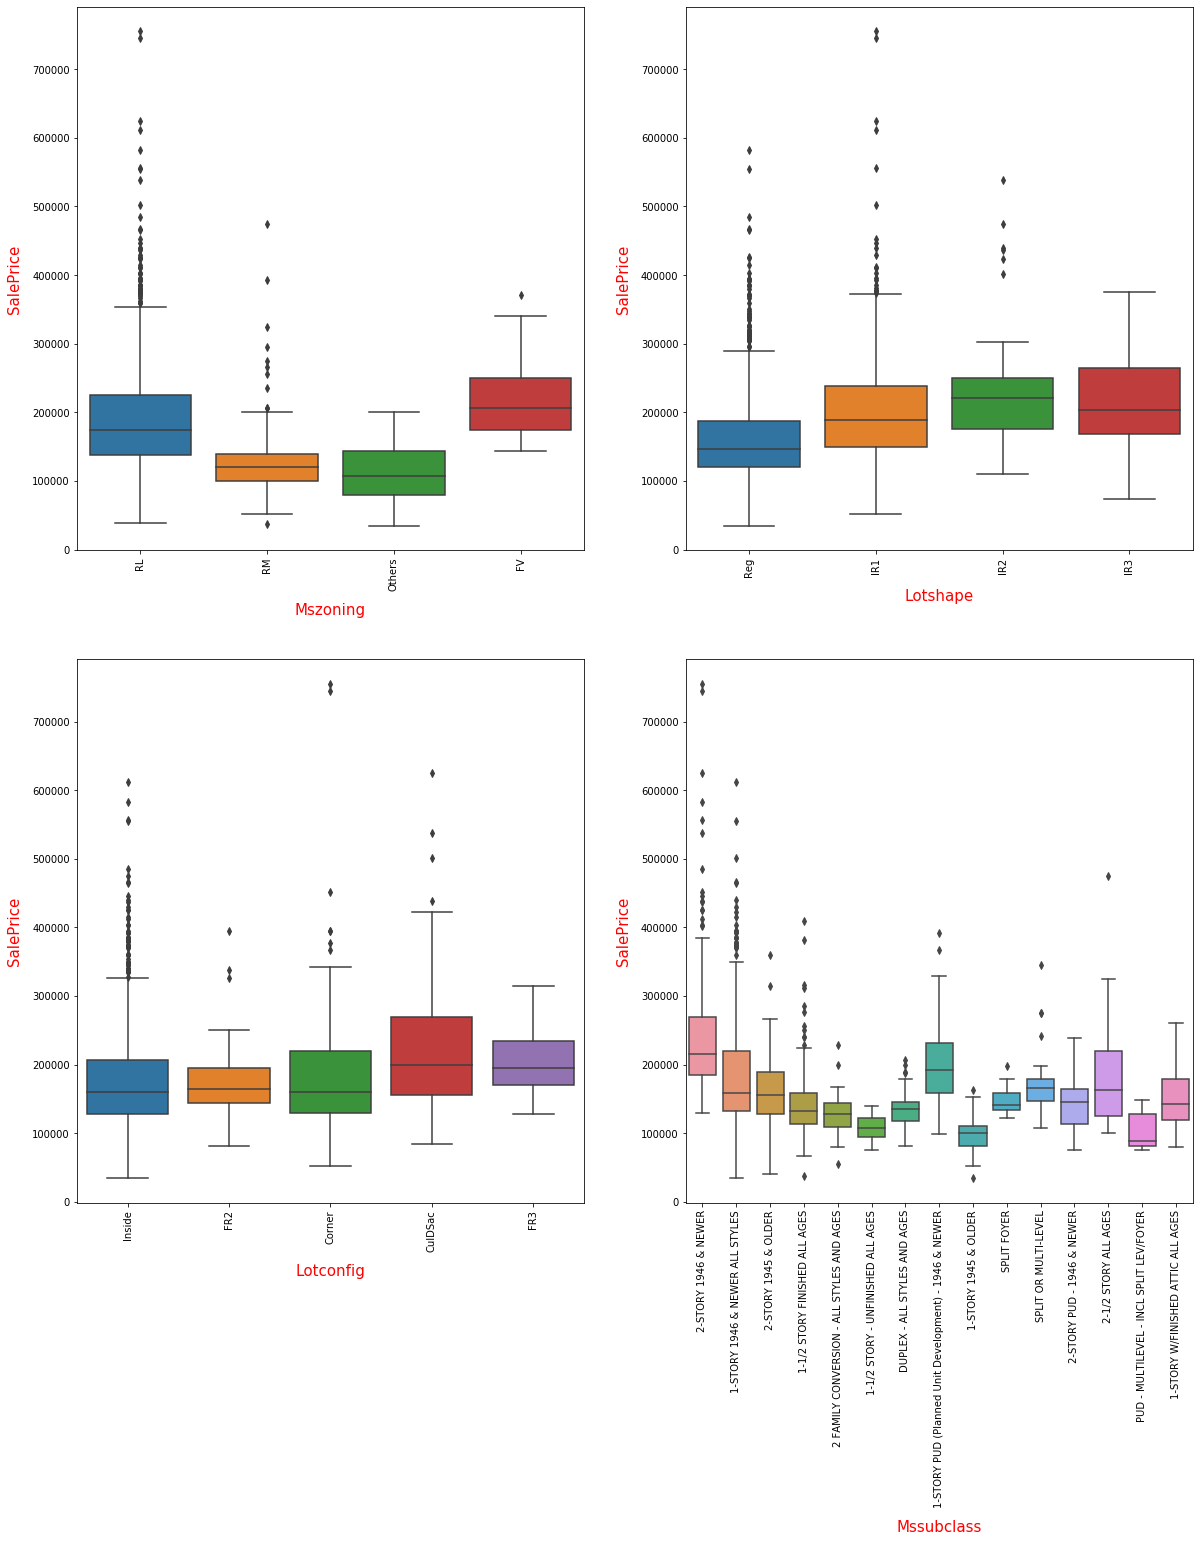

In [241]:
# extracting the list of 4 numerical variables 'MSSubClass', 'MSZoning', 'LotShape', 'LotConfig'

col1_cat_list_box=['MSZoning', 'LotShape', 'LotConfig','MSSubClass']

# Calling custom function to see the box plot and find the effect on target variable

Cat_Num_bivariate_visualize(col1_cat_list_box)

#### Inference:

- From the above plot of MSZoning, we can see that the housing sales price is `high` at `Residential Low Density and Floating Village Residential zones`

- From the above plot of Lot Shape, we can see that the housing sales price is `high` for `Slightly irregular shapped properties`

- From the above plot of Lot configuration, we can see that the housing sales price is `high` for `Cul-de-sac configuration`

- From the above plot of MSSubClass, we can see that the housing sales price is `high` for `2-STORY PUD - 1946 & NEWER` type of dwelling

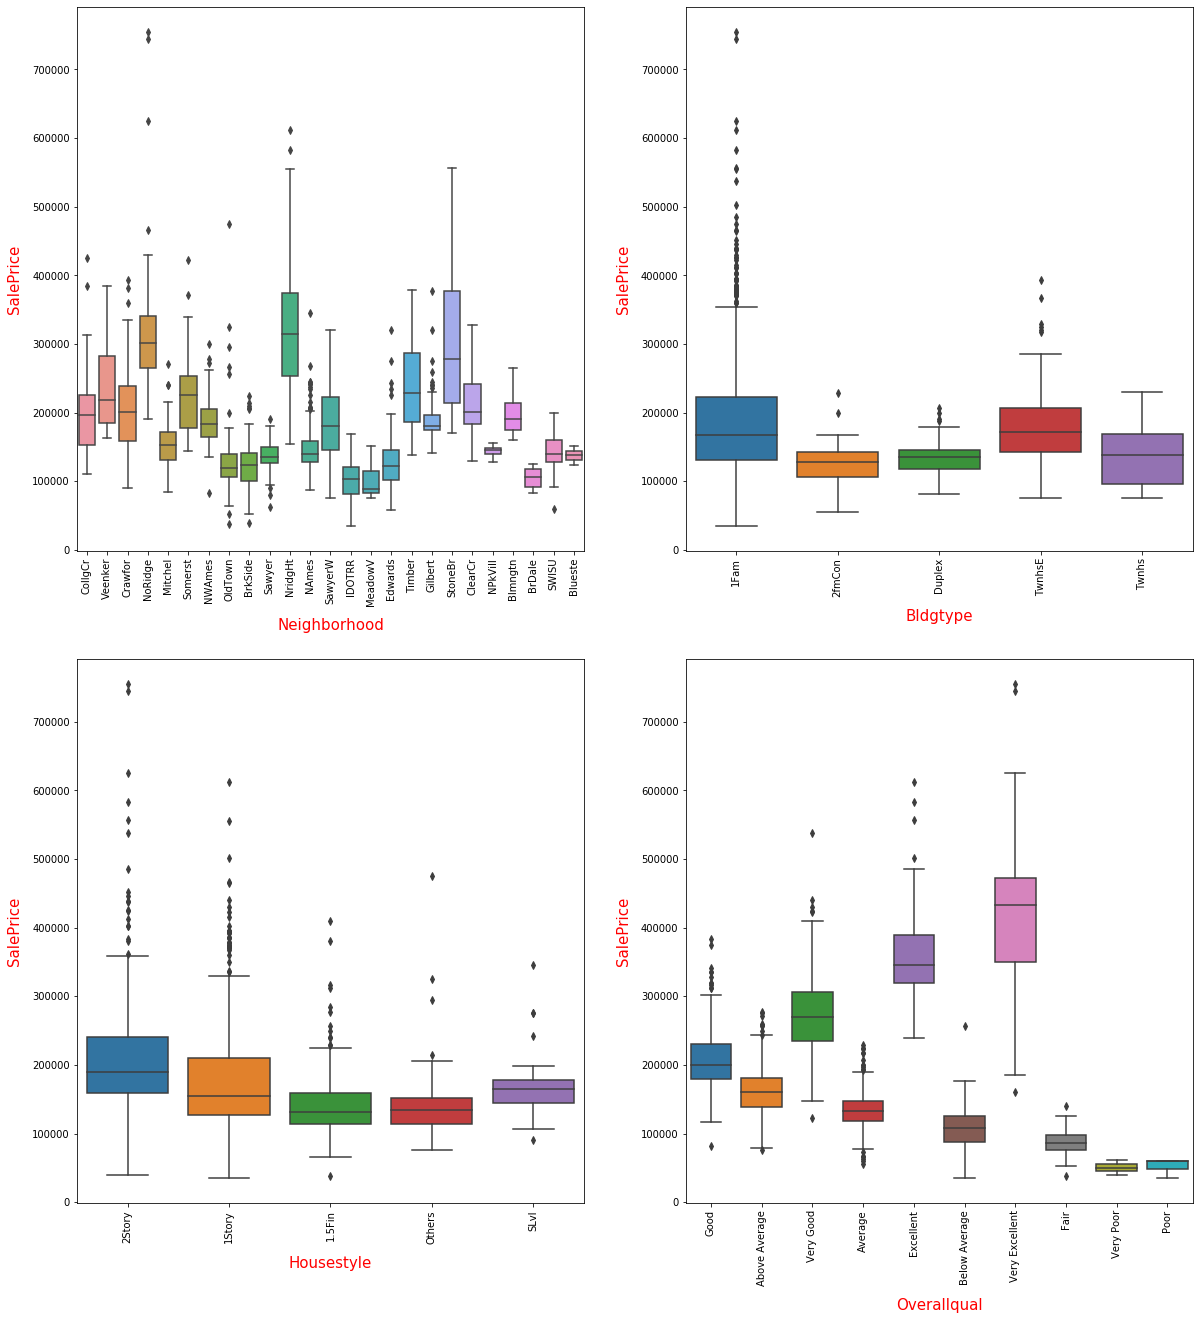

In [242]:
# extracting the list of 4 numerical variables 'Neighborhood','BldgType', 'HouseStyle', 'OverallQual'

col2_cat_list_box=['Neighborhood','BldgType', 'HouseStyle', 'OverallQual']

# Calling custom function to see the box plot and find the effect on target variable

Cat_Num_bivariate_visualize(col2_cat_list_box)

#### Inference:

- From the above plot of `BldgType`, we can see that the housing sales price is high around `Single-family Detached` dwelling

- From the above plot of `HouseStyle`, we can see that the housing sales price is high for `Two story residents`

- From the above plot of `OverallQual`, we can see that the housing sales price is high for `Very Excellent and Excellent` quality houses, where as sales price is very low for `Poor and Very Poor` quality houses

- From the above plot of `Neighborhood`, we can see that the housing sales price is high for `Stone Brook` & `Northridge Heights` locations within Ames city limits

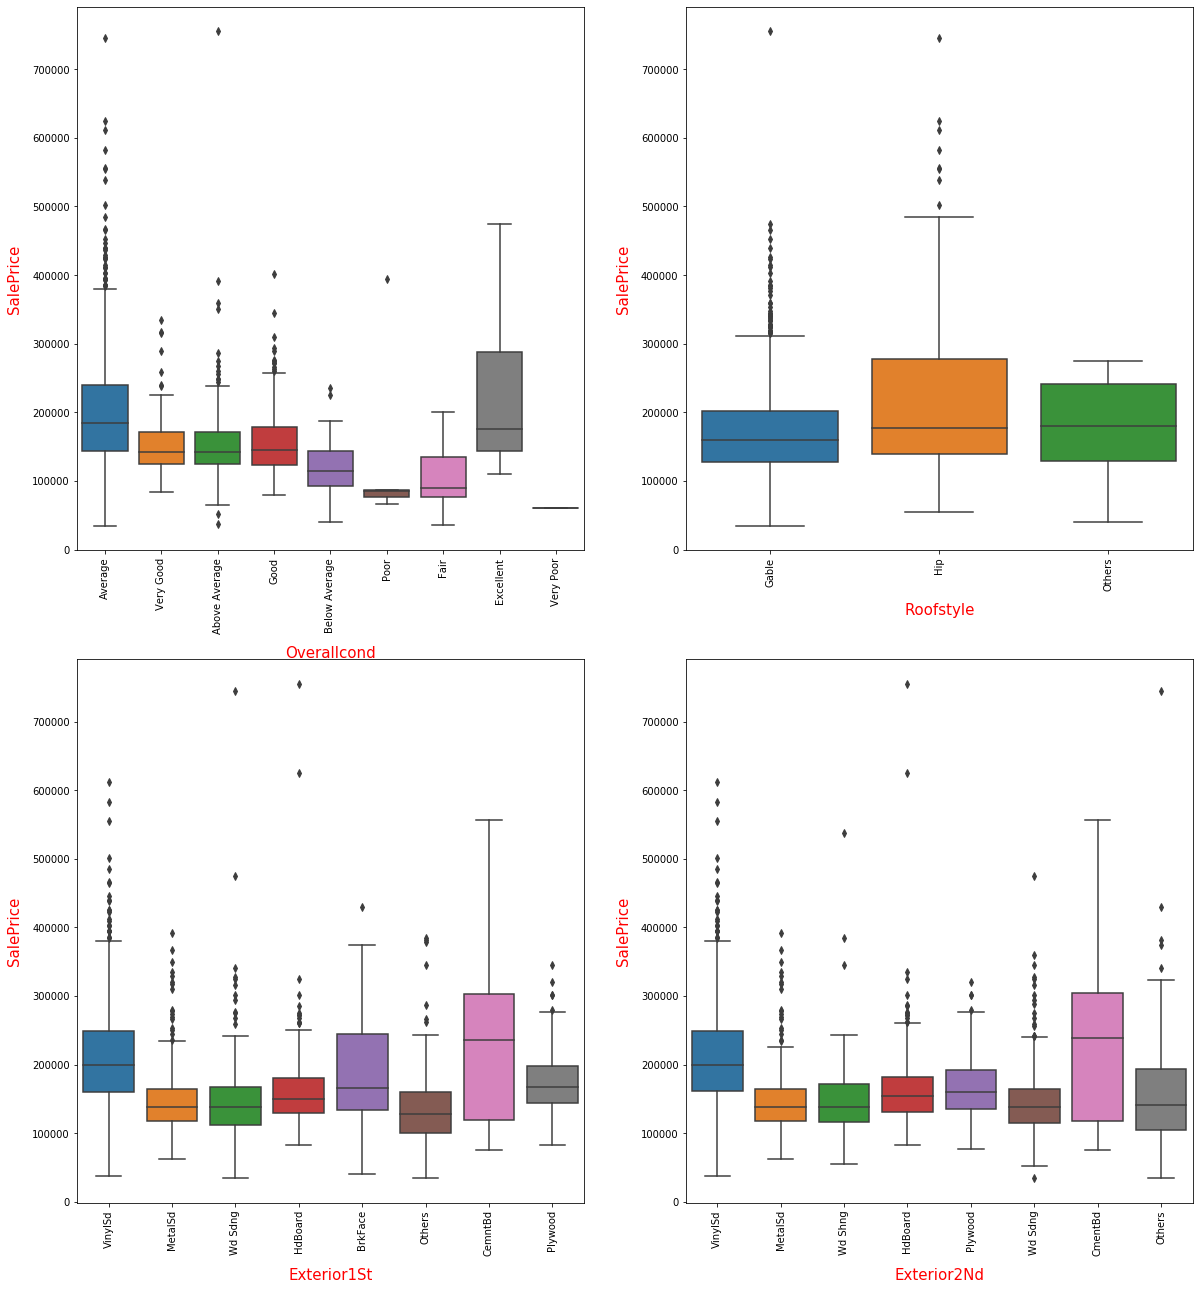

In [243]:
# extracting the list of 4 numerical variables 'OverallCond', 'RoofStyle','Exterior1st', 'Exterior2nd'

col3_cat_list_box=['OverallCond', 'RoofStyle','Exterior1st', 'Exterior2nd']

# Calling custom function to see the box plot and find the effect on target variable

Cat_Num_bivariate_visualize(col3_cat_list_box)

#### Inference:

- From the above plot of `RoofStyle`, we can see that the housing sales price is high for `Hip` type of roof and low for `Gable` type of roof

- From the above plot of `Exterior1st` and `Exterior2nd`, we can see that the housing sales price is high for `Cement Board` type of exterior covering on house

- From the above plot of `OverallCond`, we can see that the housing sales price is high where the overall condition of the house is `Excellent`

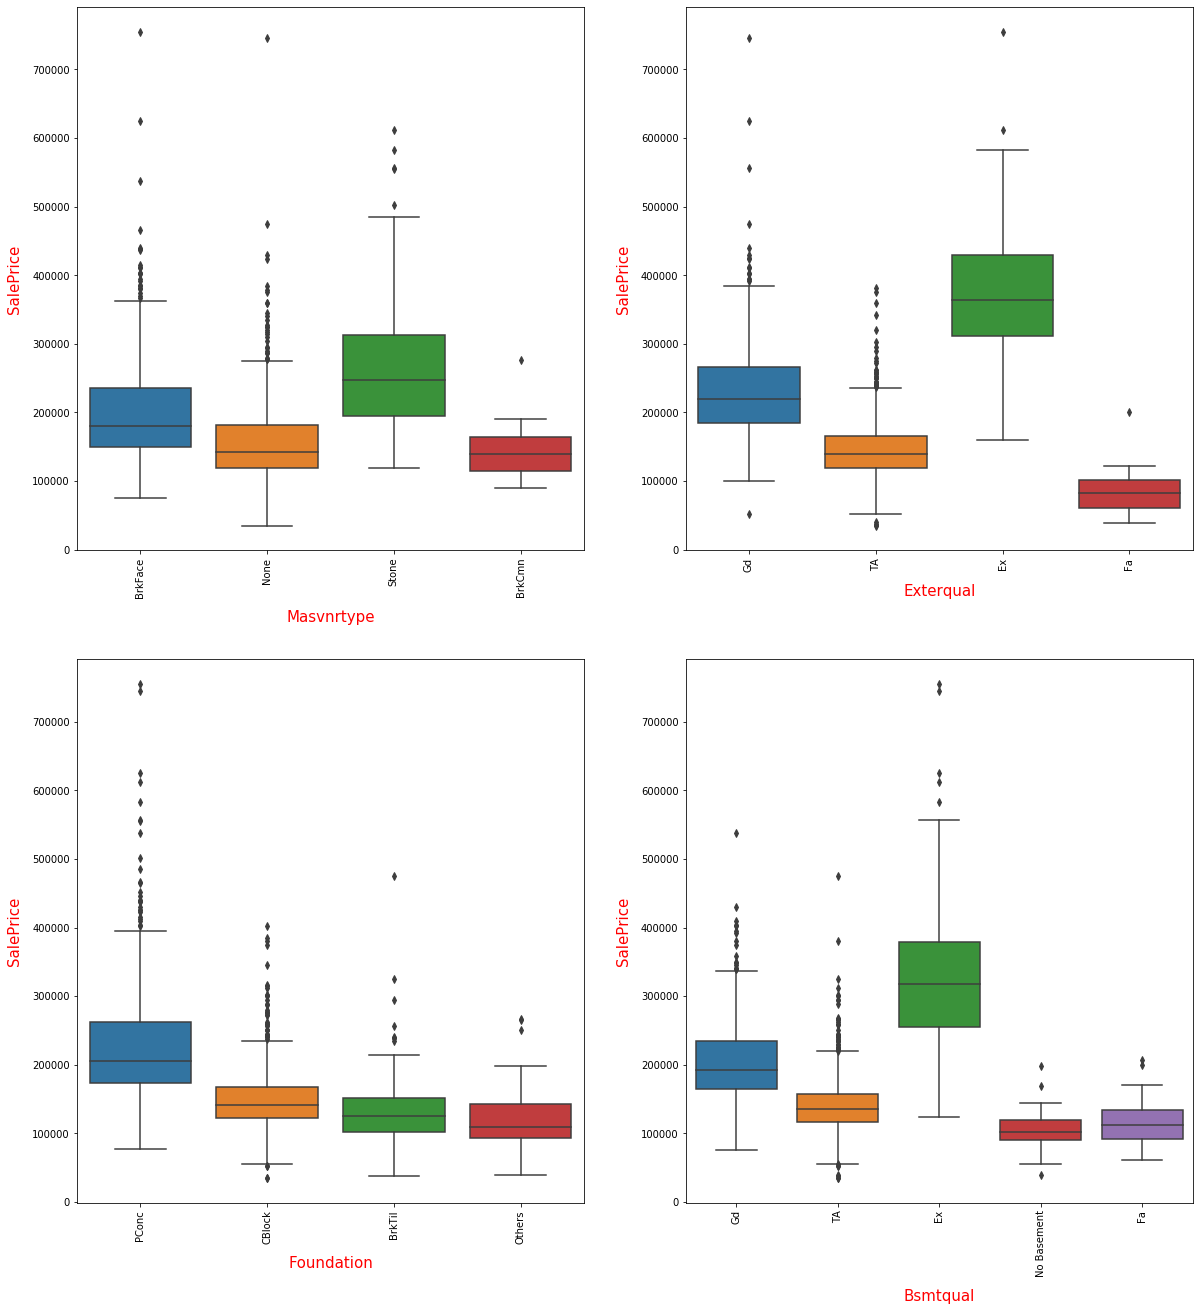

In [244]:
# extracting the list of 4 numerical variables 'MasVnrType', 'ExterQual', 'Foundation','BsmtQual'

col4_cat_list_box=['MasVnrType', 'ExterQual', 'Foundation','BsmtQual']

# Calling custom function to see the box plot and find the effect on target variable

Cat_Num_bivariate_visualize(col4_cat_list_box)

#### Inference:

- From the above plot of `MasVnrType`, we can see that the housing sales price is high where Masonry veneer type is `Stone`

- From the above plot of `ExterQual`, we can see that the housing sales price is high where the the quality of the material on the exterior is `Excellent`

- From the above plot of `Foundation`, we can see that the housing sales price is high where Type of foundation is `Poured Contrete`

- From the above plot of `BsmtQual`, we can see that the housing sales price is high where the height of the basement is `Excellent (100+ inches)`

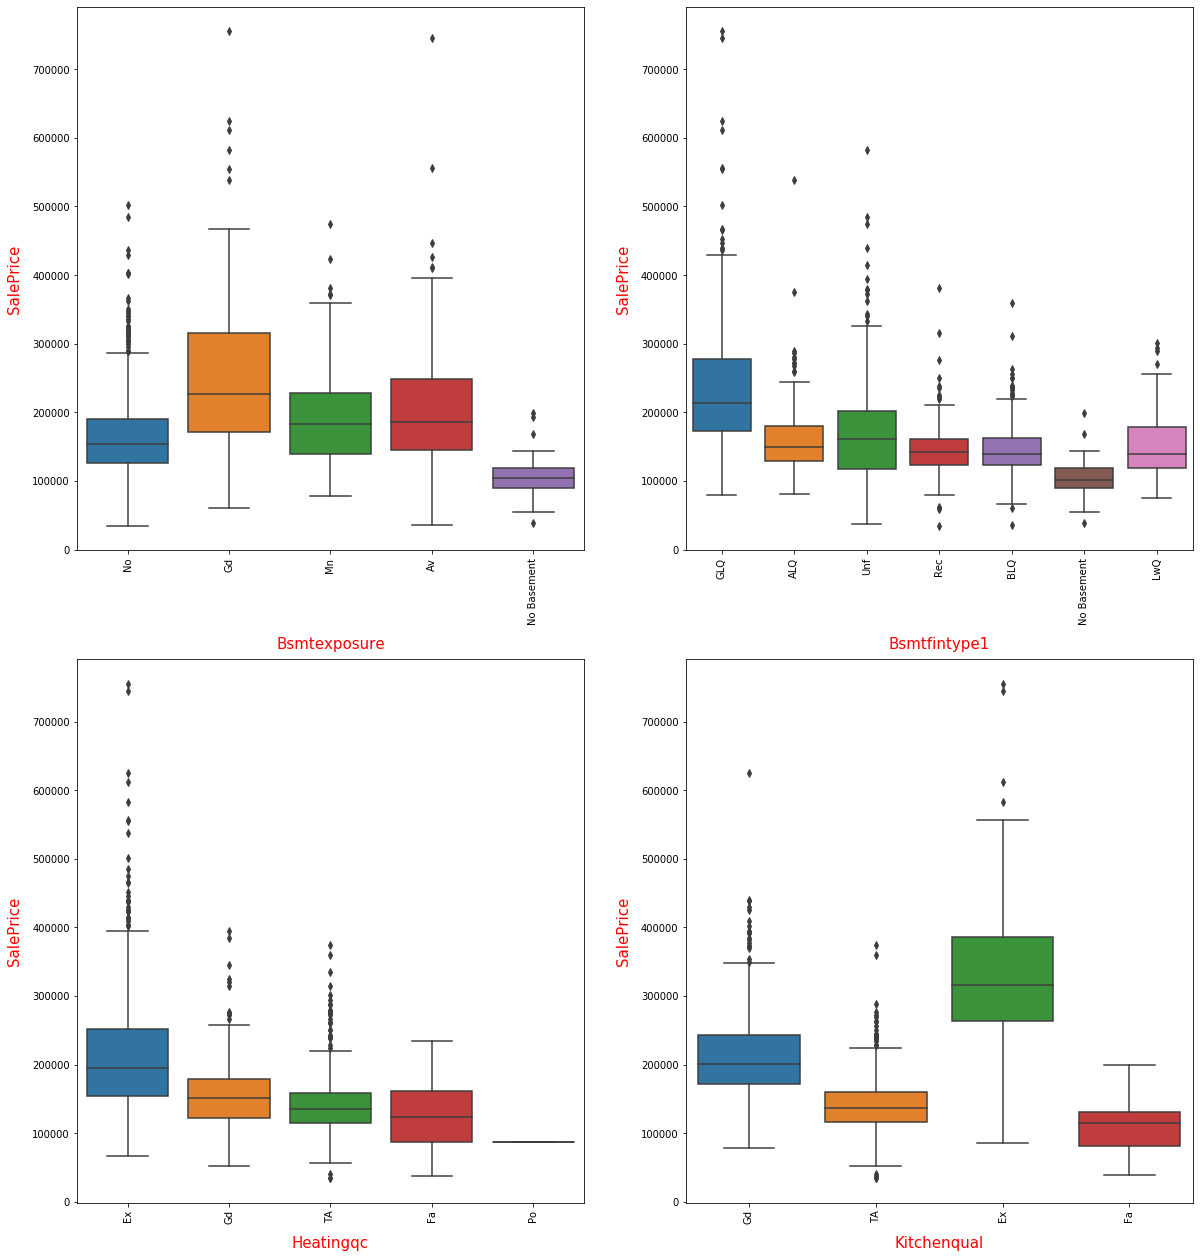

In [245]:
# extracting the list of 4 numerical variables 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual'

col5_cat_list_box=['BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual']

# Calling custom function to see the box plot and find the effect on target variable

Cat_Num_bivariate_visualize(col5_cat_list_box)

#### Inference:

- From the above plot of `HeatingQC`, we can see that the housing sales price is high where the heating quality and condition is `Excellent`

- From the above plot of `KitchenQual`, we can see that the housing sales price is high where Kitchen quality is `Excellent`

- From the above plot of `BsmtExposure`, we can see that the housing sales price is high where garden level walls are having `Good Exposure` , where as sales price is very low for `No Basement` exposure

- From the above plot of `BsmtFinType1`, we can see that the housing sales price is high where rating of basement finished area is falls at `Good Living Quarters` 

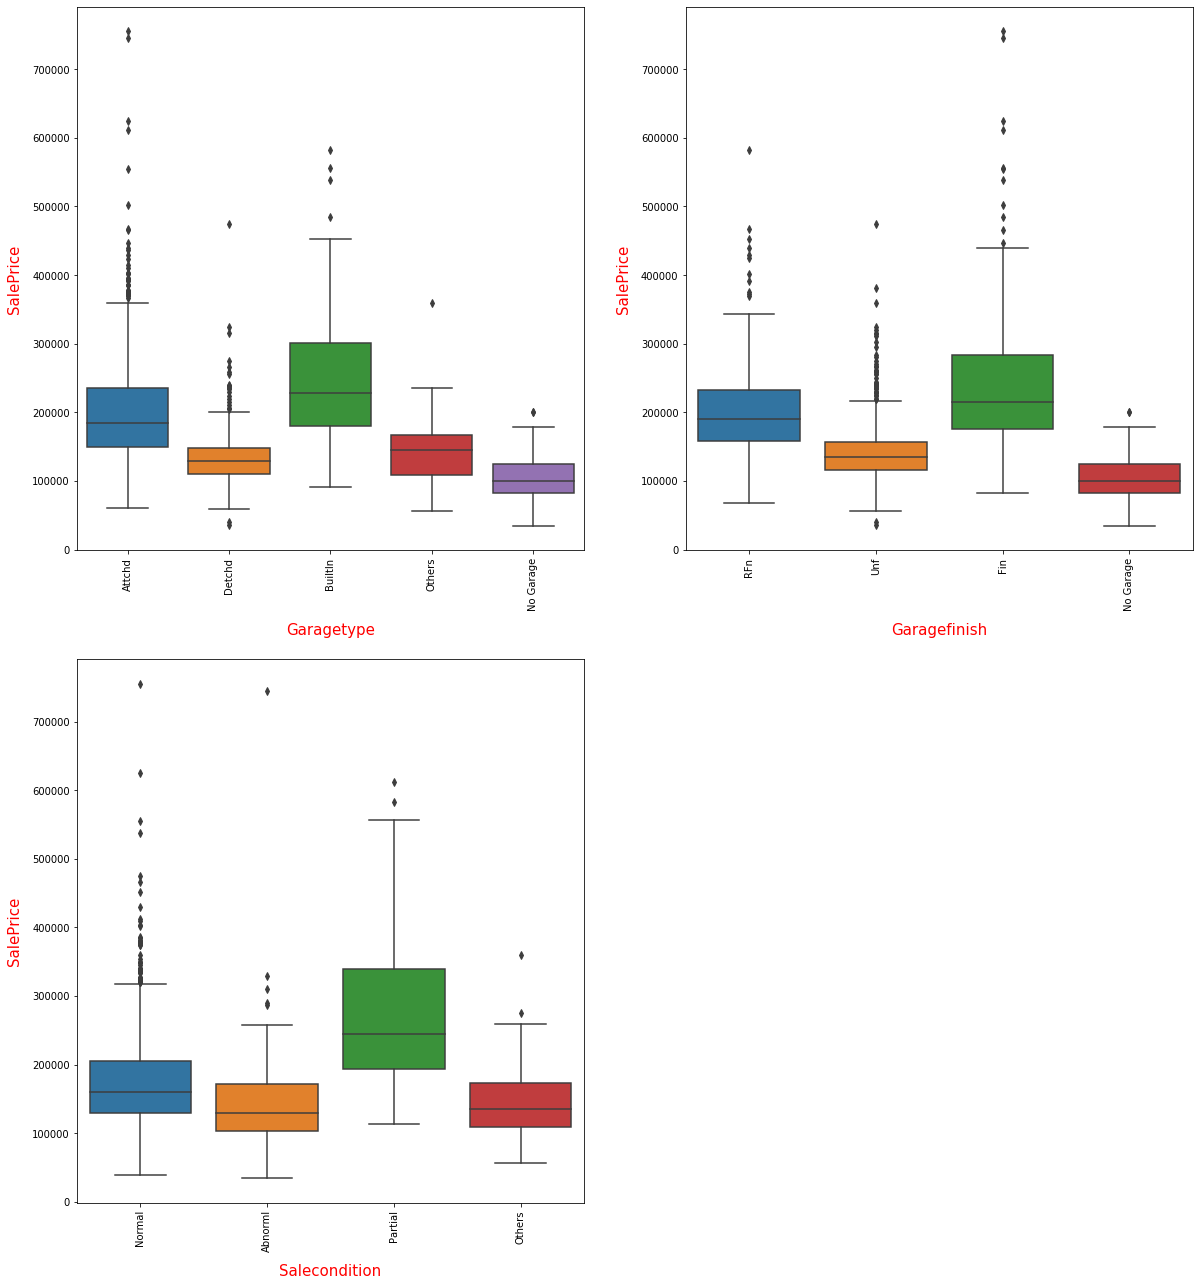

In [246]:
# extracting the list of 4 numerical variables 'GarageType', 'GarageFinish', 'SaleCondition'

col6_cat_list_box=['GarageType', 'GarageFinish', 'SaleCondition']

# Calling custom function to see the box plot and find the effect on target variable

Cat_Num_bivariate_visualize(col6_cat_list_box)

#### Inference:

- From the above plot of `SaleCondition`, we can see that the housing sales price is high where the Condition of sale is `Partial` i.e. home was not completed when last assessed (associated with New Homes)

- From the above plot of `GarageFinish`, we can see that the housing sales price is high where interior finish of the garage is `Finished`

- From the above plot of `GarageType`, we can see that the housing sales price is high where garage location is `Built-In (Garage part of house - typically has room above garage)`

### Correlation Analysis among Numerical Features

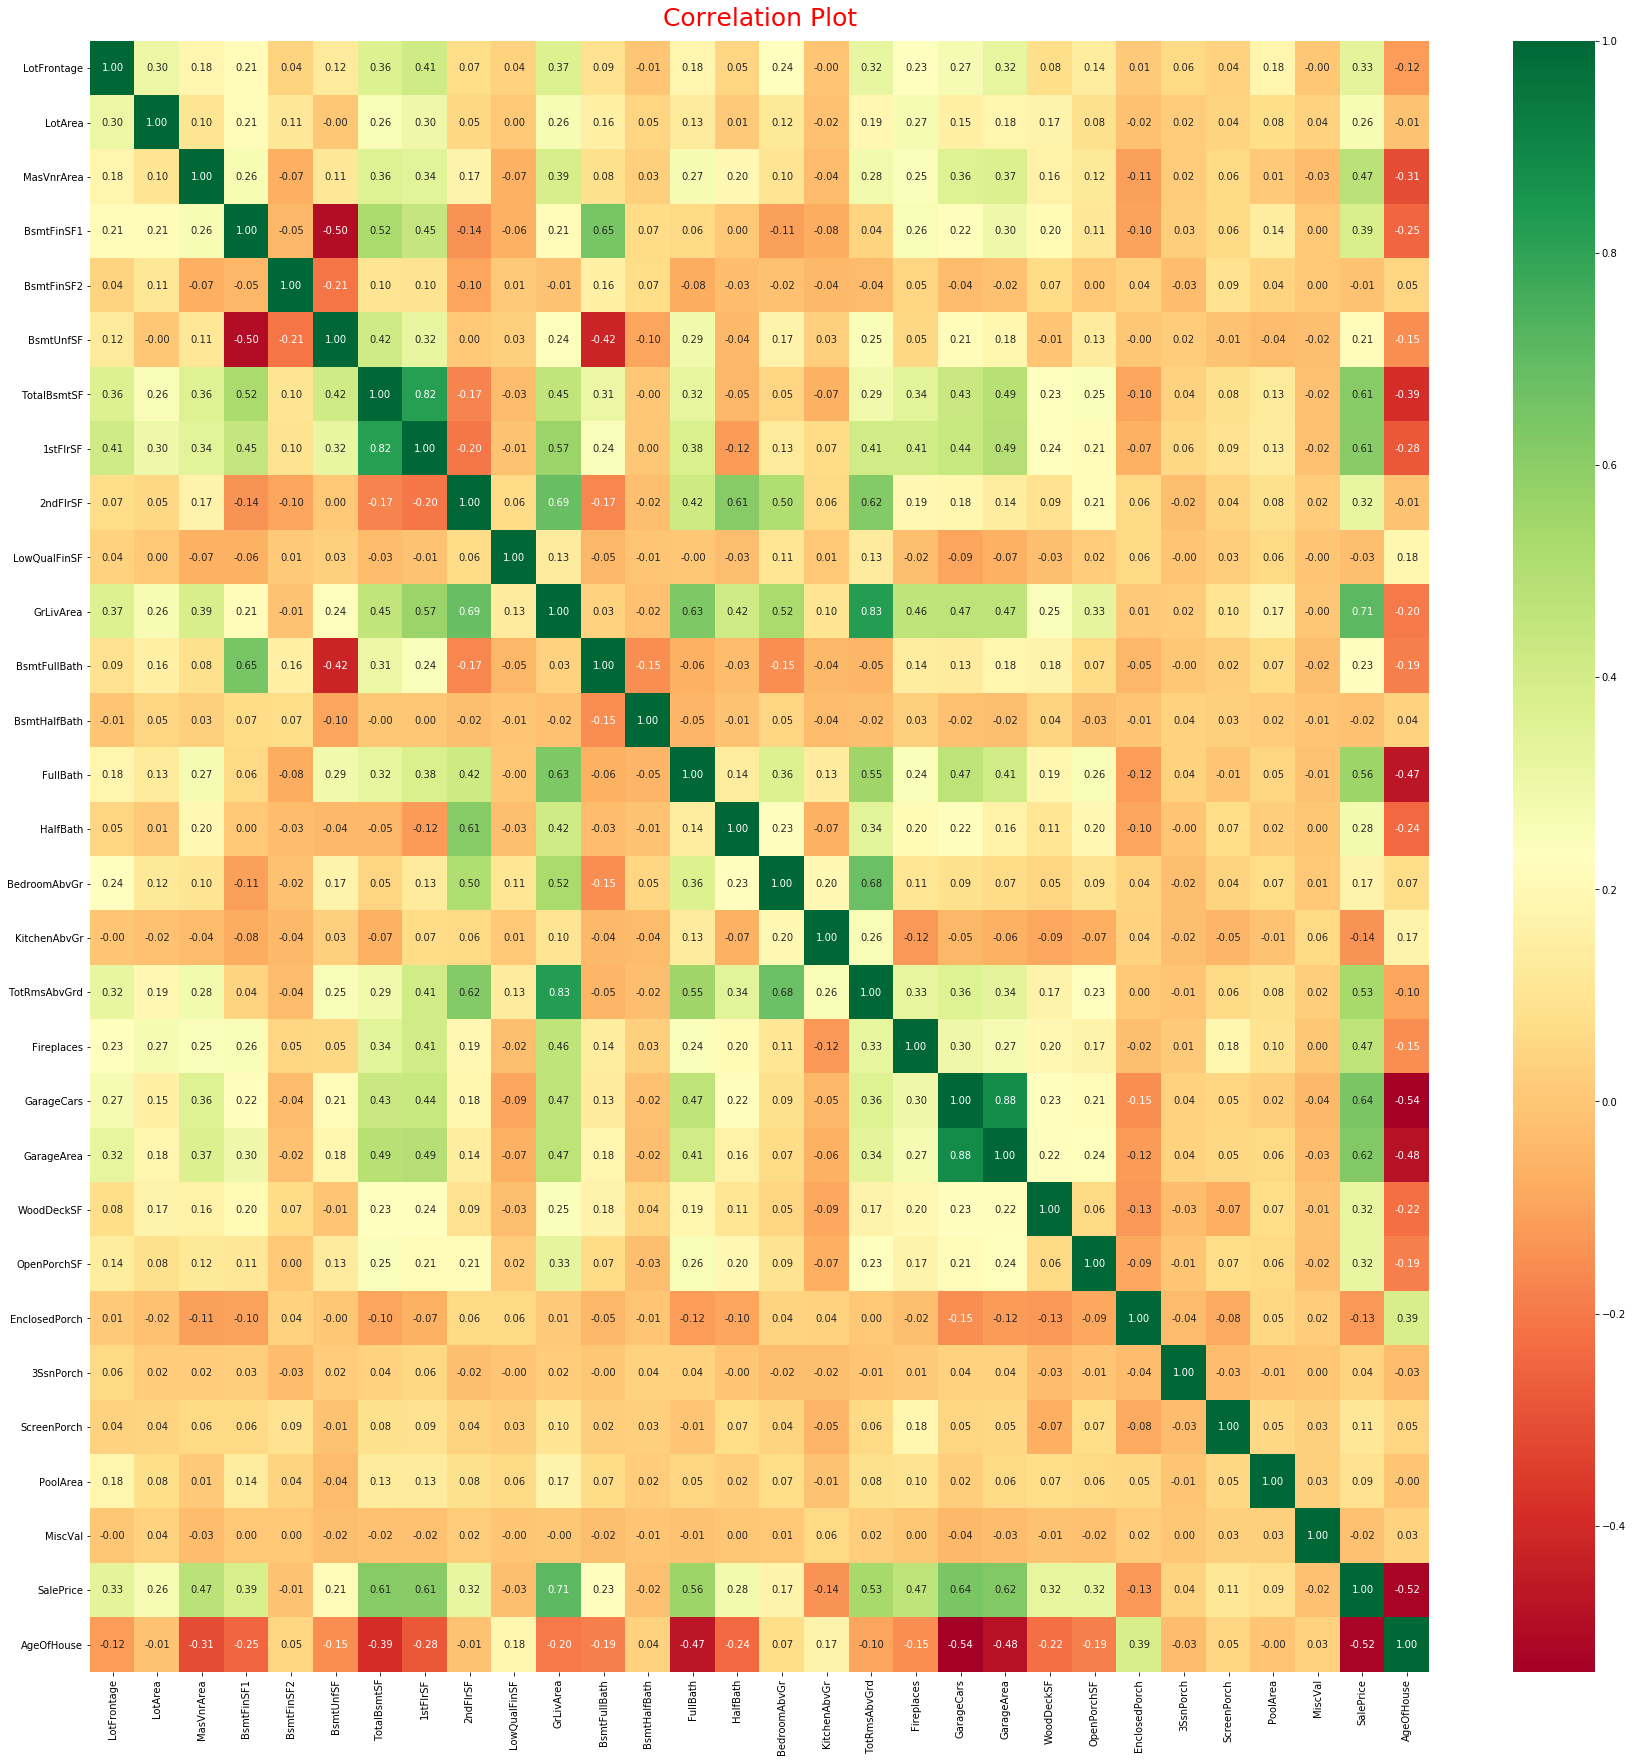

In [247]:
# Correlation check among all numerical features

# Setting figure size
plt.figure(figsize = (30,30))

# Heatmap to check correlation with correlation coefficient
sns.heatmap(surprise_housing_df.corr(), cmap = 'RdYlGn', annot = True, fmt = '0.2f')

# Putting title

plt.title("Correlation Plot",fontsize=25,color='red',pad=15)

# Showing the plot using matplotlib.pyplot show() function
plt.show()

#### Inference:

- From above heatmap we can notice that few of the predictor variables like, `ToatalBsmtSF and 1stFlrSF`, `GrLivArea and TotRmsAbvGrd`, `GarageArea and GarageCars`, `BsmtFinSF and BsmtFullBath` etc. are having positive linear relationship among each other, i.e., they are positively co-linear with each other.

## Data Preparation:

- Target `Variable Transformation`
- `Create dummies` for categorical variable
- Perform `train test split`
- `Scalling`

### Target VariableTransformation

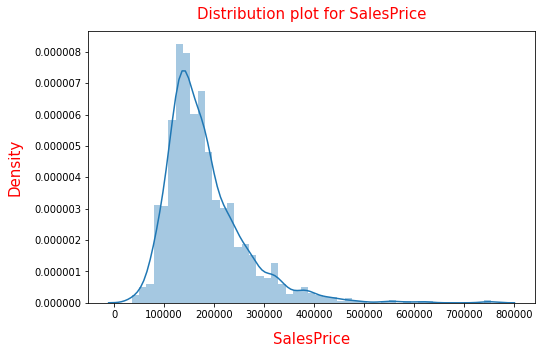

In [248]:
# Checking distribution of target vriable SalePrice

plt.figure(figsize=(8,5))

# Ploting distribution plot

sns.distplot(surprise_housing_df['SalePrice'])

# Formating the distplot

plt.title('Distribution plot for SalesPrice',color='red',pad=12,fontsize=15)

plt.xlabel('SalesPrice',fontsize='15',color='red',labelpad=12)

plt.ylabel('Density',fontsize='15',color='red',labelpad=12)

# Showing the plot

plt.show()

#### Inference:

- From the above `distribution plot`, we can see that the distribution of Target variable `SalePrice` is not normal. It is `right skwed.`

- Hence, we are performing **Log Transformation** on the target column, so that the distribution becomes `Normal`

In [249]:
# Displaying the amount of skewness

print("Skewness: %f" % surprise_housing_df['SalePrice'].skew())

Skewness: 1.882876


In [250]:
# Log Transformation of target variable to reduce skewness and normalise it

surprise_housing_df['SalePrice']=np.log(surprise_housing_df.SalePrice)

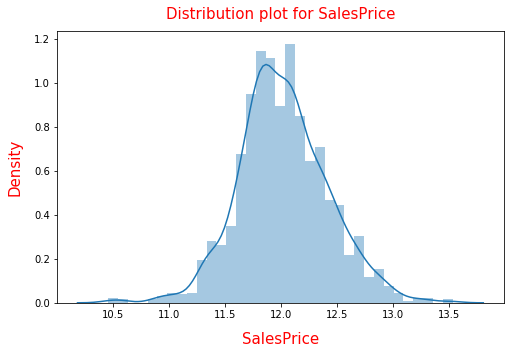

In [251]:
# Checking distribution of target vriable SalePrice after log transformation

plt.figure(figsize=(8,5))

# Ploting distribution plot

sns.distplot(surprise_housing_df['SalePrice'])

# Formating the distplot

plt.title('Distribution plot for SalesPrice',color='red',pad=12,fontsize=15)

plt.xlabel('SalesPrice',fontsize='15',color='red',labelpad=12)

plt.ylabel('Density',fontsize='15',color='red',labelpad=12)

# Showing the plot

plt.show()

In [252]:
# Displaying the amount of skewness after log transformation of target variable

print("Skewness: %f" % surprise_housing_df['SalePrice'].skew())

Skewness: 0.121335


#### Inference:

- Above distribution plot depicts that, after log transformation the distribution of Target variable `SalePrice` is become almost `normal`

In [253]:
surprise_housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,AgeOfHouse
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,Normal,12.247694,18
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,Normal,12.109011,45
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,Normal,12.317167,20
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,Abnorml,11.849398,106
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,Normal,12.429216,21


## Categorical to  Dummy Variable convertion

In [254]:
# checking all categorical columns to form dummy variables

cat_to_dummy_list = surprise_housing_df.select_dtypes(include=['object']).columns.to_list() 

# Fetching the columns which are categorical

cat_to_dummy_list

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

In [255]:
# converting categorical variable to dummies

cat_dummies=pd.get_dummies(surprise_housing_df[cat_to_dummy_list],drop_first=True)

# fetching first 5 rows from dummies dataframe

cat_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [256]:
# concatinating dummy dataframe to original dataframe 

surprise_housing_df=pd.concat([surprise_housing_df,cat_dummies],axis=1)

# displaying the first 5 rows of original dataframe

surprise_housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,AgeOfHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,Normal,12.247694,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,Normal,12.1090

In [257]:
# dropping original columns from surprise_housing_df dataframe after dummy creation

drop_cols(surprise_housing_df,cat_to_dummy_list)

- Once we `converted all the categorical features into dummy variables` , we have **dropped the original columns**.

In [258]:
# checking the number of rows and columns after dummification

surprise_housing_df.shape

(1460, 159)

- After dummification, we can see now there are total `159 number of columns` present in dataset

In [259]:
# displaying the first 5 rows of original dataframe after droping of original columns after dummification

surprise_housing_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeOfHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,12.247694,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,12.109011,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,12.317167,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,

### Top 10 correlated features with Target column

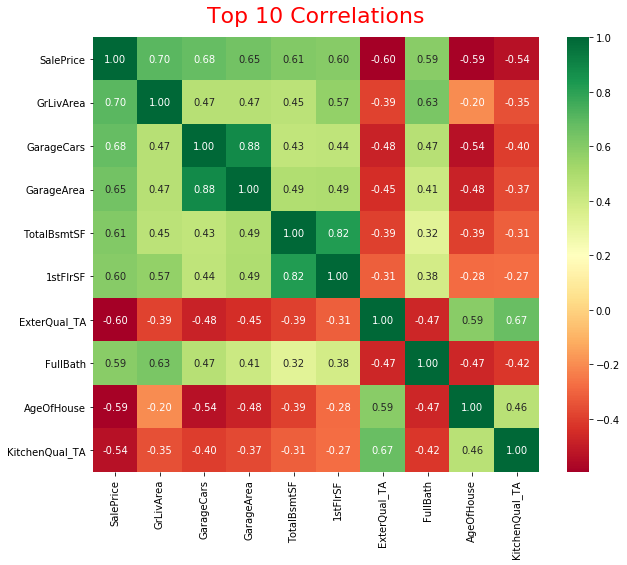

In [260]:
# ploting the top 10 correlation with respect to target columns

# formating figure size

plt.figure(figsize=(10,8))

# Building correlation matrix

corr_matrix = surprise_housing_df.corr()

# Taking the abosolute value of the correlations

corr_matrix['SalePrice']=abs(corr_matrix['SalePrice'])

# Calculating top 10 correlation and order it by target column

cols = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index

# Ploting heatmap

sns.heatmap(surprise_housing_df[cols].corr(),cmap = 'RdYlGn',fmt = '0.2f',annot=True)

# Putting title

plt.title("Top 10 Correlations",fontsize=22,color='red',pad=15)

# Showing the plot

plt.show()

#### Inference:

- Following variables are having good correlation (positive and negative) with Target variable `SalePrice`
    
    - **Positive Corelation with Target:**
        - GrLivArea
        - GarageCars
        - GarageArea
        - TotalBsmtSF
        - 1stFlrSF
        - FullBath
    
    - **Negative Corelation with Target:**
        - ExterQual_TA
        - AgeOftheHouse
        - KitchenQual_TA

### Train  Test  Split and seperating predictor from Target variable

In [261]:
# Spiting dataframe into train (70%) and test data (30%) for model building using sklearn library train_test_split method

surprise_housing_df_train,surprise_housing_df_test = train_test_split(surprise_housing_df,train_size=0.70,random_state=100)

In [262]:
# Checking the number of rows in train dataset

print(surprise_housing_df_train.shape)

(1021, 159)


In [263]:
# Checking the number of rows in test dataset

print(surprise_housing_df_test.shape)

(439, 159)


In [264]:
# Spliting train data into X_train and y_train variables for model building 

# Popping the SalePrice column into y_train 

y_train=surprise_housing_df_train.pop('SalePrice')

# Defining the X_train for rest columns

X_train=surprise_housing_df_train

In [265]:
# Spliting train data into X_test and y_test variables for model building 

# Popping the SalePrice column into y_test 

y_test=surprise_housing_df_test.pop('SalePrice')

# Defining the X_test for rest columns

X_test=surprise_housing_df_test

In [266]:
# checking the shape for y train dataset

y_train.shape

(1021,)

In [267]:
# checking the shape for y test dataset

y_test.shape

(439,)

In [268]:
# checking the shape for X train dataset

X_train.shape

(1021, 158)

In [269]:
# checking the shape for X test dataset

X_test.shape

(439, 158)

- We have splitted the dataset in to train and test for modelling.

### Scalling the DataFrame

#### Scalling Train Dataset

In [270]:
# Perform scalling on train dataset

# Using Standard scaler preprocessing technique to standarized data columns(excluding dummy and target columns)

scaler = StandardScaler()

# Creating column list to be scaled

col_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'AgeOfHouse']

# Fitting and transforming numerical columns and storing back into original train dataset

X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

# Checking top 5 rows from train dataset

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOfHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
318,0.925326,-0.057261,0.809137,1.159065,-0.293313,-0.454262,0.621091,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,1.555150,0.622148,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.715324,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
239,-0.795709,-0.169753,-0.558025,-0.761831,-0.293313,0.172244,-0.712611,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,0.308833,0.622148,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.868511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1

#### Scalling Test Dataset

In [271]:
# Perform scalling on test dataset

# Using Standard scaler preprocessing technique to standarized data columns(excluding dummy and target columns)

# transforming numerical columns and storing back into original test dataset based on what it has learn from train

X_test[col_scale] = scaler.transform(X_test[col_scale])

# Checking top 5 rows from test dataset

X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOfHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1436,-0.433386,-0.144614,-0.558025,0.361022,-0.293313,-0.703973,-0.431488,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.937484,-0.927153,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.010600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
57,0.880036,0.112107,-0.558025,-0.964030,-0.293313,0.660517,-0.440205,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.308833,-0.927153,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.078286,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,

- **Feature Scaling**: We standardized the numeric attributes and we have made the data scale free.

## Model Building

- Use techniques like `RFE to perform variable selection`
- Perform `Lasso and Ridge regularization` technique with different values of alpha
- For `Ridge choose the best alpha and build model`
- For `Lasso choose the best alpha and build model`
- Check the `model performance over the train and test data`
- Find out `best features that describes the price of the house for both final models created using Ridge and Lasso`

### RFE for recursive feature elimination

In [272]:
# Now will do a important feature selection based on RFE (Recursive feature elimination)

# Iinitilize the LinearRegression

lin_mod=LinearRegression()

# Fit X and y into model

lin_mod.fit(X_train,y_train)

# Doing the important feature selection using RFE method

rfe_lin_mod=RFE(lin_mod,80)

rfe_lin_mod=rfe_lin_mod.fit(X_train,y_train)

In [273]:
# Displaying features impotancewise  and it ranking in list format

list(zip(X_train.columns,rfe_lin_mod.support_,rfe_lin_mod.ranking_))

[('LotFrontage', False, 52),
 ('LotArea', False, 50),
 ('MasVnrArea', False, 69),
 ('BsmtFinSF1', False, 11),
 ('BsmtFinSF2', False, 13),
 ('BsmtUnfSF', False, 14),
 ('TotalBsmtSF', False, 12),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 10),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 17),
 ('BsmtHalfBath', False, 70),
 ('FullBath', False, 31),
 ('HalfBath', False, 32),
 ('BedroomAbvGr', False, 75),
 ('KitchenAbvGr', False, 23),
 ('TotRmsAbvGrd', False, 26),
 ('Fireplaces', False, 41),
 ('GarageCars', True, 1),
 ('GarageArea', False, 74),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', False, 73),
 ('EnclosedPorch', False, 57),
 ('3SsnPorch', False, 65),
 ('ScreenPorch', False, 56),
 ('PoolArea', False, 63),
 ('MiscVal', False, 79),
 ('AgeOfHouse', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 34),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 37),
 ('MSSubClass_1-STORY PUD (Planne

In [274]:
# Extracting and Displaying important feature after RFE

col_imp_features=X_train.columns[rfe_lin_mod.support_].to_list()

# Printing the imortant features

col_imp_features

['1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageCars',
 'AgeOfHouse',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSZoning_Others',
 'LotShape_IR3',
 'LotConfig_CulDSac',
 'LotConfig_FR3',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Gilbert',
 'Neighborhood_MeadowV',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'HouseStyle

In [275]:
# Extracting and Displaying less important feature after RFE

col_less_imp_features=X_train.columns[~ rfe_lin_mod.support_]

print(col_less_imp_features)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_Reg',
       'LotConfig_FR2', 'LotConfig_Inside', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'BldgType_TwnhsE', 'HouseStyle_2Story',
       'Hous

#### Inference:

- There are total `158` columns in original dataframe.

- `Lasso Regularization` will not propely reduce the coefficients from such large features.

- Hence, we have selected `80 features` out of 158 using `recurssive feature elimination technique`, So that Lasso/Ridge can perform well and reduce the coefficient to generate a good model

In [276]:
# creating the new X_train dataframe with important features

X_train_model=X_train[col_imp_features]

## Ridge Regularization

### Hyperparameter tuning to select optimal Alpha

In [277]:
# Ridge Regression

# List of alphas to tune the hyperparameter for below list of alpha

params = {'alpha': [0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Initialize the Ridge Regression 

ridge = Ridge()

# Cross validation initialization with Kfold

folds=KFold(n_splits=5,random_state=100,shuffle=True)

# Using GridSearchCV to tune hyperparameter 

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring='neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)   

# Fitting the model for grid search CV 

model_cv.fit(X_train_model, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [278]:
# Creating dataframe for grid search cv results for test and train score

cv_result_ridge=pd.DataFrame(model_cv.cv_results_)

# Displaying the CV results 

cv_result_ridge


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003120,0.006240,0.00312,0.006240,0.001,{'alpha': 0.001},-0.013871,-0.029297,-0.017219,-0.022438,-0.015043,-0.019574,0.005680,13,-0.015859,-0.012784,-0.015302,-0.013546,-0.015378,-0.014574,0.001191
1,0.006240,0.007642,0.00312,0.006240,0.01,{'alpha': 0.01},-0.013860,-0.029318,-0.017208,-0.022434,-0.015032,-0.019570,0.005692,12,-0.015859,-0.012784,-0.015302,-0.013546,-0.015379,-0.014574,0.001191
2,0.006240,0.007642,0.00312,0.006240,0.05,{'alpha': 0.05},-0.013812,-0.029408,-0.017161,-0.022418,-0.014984,-0.019557,0.005743,11,-0.015861,-0.012785,-0.015304,-0.013547,-0.015380,-0.014575,0.001191
3,0.003120,0.006240,0.00000,0.000000,0.1,{'alpha': 0.1},-0.013756,-0.029517,-0.017113,-0.022401,-0.014927,-0.019543,0.005803,10,-0.015864,-0.012788,-0.015309,-0.013551,-0.015384,-0.014579,0.001191
4,0.006240,0.007642,0.00000,0.000000,0.2,{'alpha': 0.2},-0.013657,-0.029721,-0.017040,-0.022376,-0.014822,-0.019523,0.005913,9,-0.015878,-0.012799,-0.015325,-0.013566,-0.015400,-0.014593,0.001193
5,0.006240,0.007642,0.00000,0.000000,0.3,{'alpha': 0.3},-0.013572,-0.029908,-0.016987,-0.022360,-0.014729,-0.019511,0.006012,8,-0.015898,-0.012813,-0.015347,-0.013586,-0.015422,-0.014613,0.001195
6,0.012480,0.006240,0.00312,0.006240,0.4,{'alpha': 0.4},-0.013500,-0.030079,-0.016945,-0.022351,-0.014644,-0.019504,0.006102,5,-0.015922,-0.012830,-0.015373,-0.013611,-0.015449,-0.014637,0.001198
7,0.006240,0.007643,0.00624,0.007643,0.5,{'alpha': 0.5},-0.013437,-0.030236,-0.016910,-0.022349,-0.014568,-0.019500,0.006183,3,-0.015949,-0.012848,-0.015401,-0.013639,-0.015479,-0.014663,0.001201
8,0.006240,0.007642,0.00312,0.006240,0.6,{'alpha': 0.6},-0.013382,-0.030381,-0.016881,-0.022352,-0.014498,-0.019499,0.006258,1,-0.015979,-0.012868,-0.015430,-0.013669,-0.015512,-0.014692,0.001204
9,0.009360,0.007643,0.00000,0.000000,0.7,{'alpha': 0.7},-0.013334,-0.030515,-0.016854,-0.022358,-0.014435,-0.019499,0.006327,2,-0.016011,-0.012888,-0.015460,-0.013700,-0.015547,-0.014721,0.001208


In [279]:
# Creating custom function for Plotting line plot the param alpha VS mean_train score and mean_test score for ridge regression

# Function definition
def cv_result_plot(cv_result_df,scale):
    plt.figure(figsize=(8,6))
    plt.plot(cv_result_df['param_alpha'].astype('float32'), cv_result_df['mean_train_score'])
    plt.plot(cv_result_df['param_alpha'].astype('float32'), cv_result_df['mean_test_score'])

# Formating the plots

    plt.xlabel('Alpha',fontsize=15,color='red',labelpad=15)
    plt.ylabel('Negative Mean Squared Error',fontsize=15,color='red',labelpad=15)
    if scale=='log':
        plt.xscale('log')
    plt.title("Plot for Negative Mean Squared Error vs Alpha",fontsize=15,color='red',pad=15)
    plt.legend(['train score', 'test score'], loc='upper right')

# Showing the plot

    plt.show()

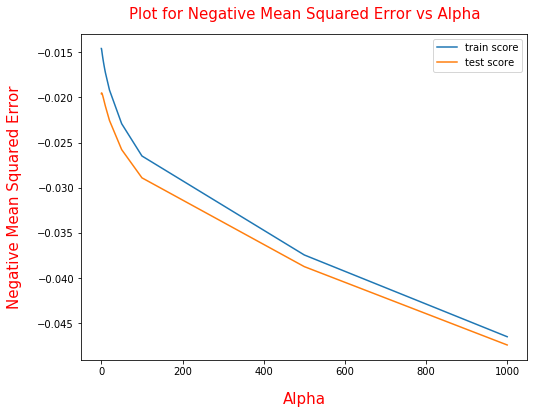

In [280]:
# Calling the custom function for line plot for param alpha VS mean_train score and mean_test score for ridge regression

cv_result_plot(cv_result_ridge,' ')

In [281]:
# Displaying the best parameter for alpha for ridge regression

model_cv.best_params_


{'alpha': 0.6}

#### Inference:

- After hyperparameter tuning, we got optimal alpha (hyperparameter) for Ridge as **0.6**

In [282]:
# Displaying the best score  for mean negative mean squared error after grid search CV

model_cv.best_score_

-0.01949859030501403

#### Model fitment with best alpha

In [283]:
# storing the best estimator from grid search cv for ridge regularization in a variable to fit the model

best_estimator_ridge=model_cv.best_estimator_

In [284]:
# fittinf the model with best estimator for rigde regression

best_estimator_ridge.fit(X_train_model, y_train)


Ridge(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [285]:
# Predicting the y_train_pred from the trained model

y_train_pred=best_estimator_ridge.predict(X_train_model)

In [286]:
# custom function to calculate the evaluation metrics like r2 Score,RMSE etc.

def print_evaluation_metrics(true_value, predicted_value):  

  # calculating mean_squared_error

    mse = metrics.mean_squared_error(true_value, predicted_value)

  # calculating root_mean_squared_error

    rmse = np.sqrt(metrics.mean_squared_error(true_value, predicted_value))

  # calculating r2 score

    r2_square = metrics.r2_score(true_value, predicted_value)

  # printing the metrics
    print('-----------------------------------')
    print('MSE:\033[1m'+str(mse)+'\033[0m')
    print('RMSE:\033[1m'+str(rmse)+'\033[0m')
    print('R2 Score:\033[1m'+str(r2_square)+'\033[0m')
    print('R2 Score Percentage:\033[1m'+str(r2_square*100)+'\033[0m')
    print('-----------------------------------')

In [287]:
# calling the custom function for displaying the evaluation metrics after ridge regression
print('For Train Dataset Evaluation : Ridge Regression')
print_evaluation_metrics(y_train,y_train_pred)

For Train Dataset Evaluation : Ridge Regression
-----------------------------------
MSE:0.015092532018860733
RMSE:0.12285166673212347
R2 Score:0.9039575362628318
R2 Score Percentage:90.39575362628318
-----------------------------------


#### Inference:

- The calculated **R-squared** value of train dataset is **0.9039** or **90.39%**, which means the model is able to explain 90.39% variance in it.

- This a very **good r2_score** value.

- The calculated **MSE (mean squared error)** value of train dataset is **0.01509253** and **RMSE (Root mean squared error)** value on train dataset is **0.1228516**.

- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

In [288]:
# Diaplaying the model coefficients after ridge regression

# Building the dataframe

model_parameters_ridge=pd.DataFrame()

# Storing the features

model_parameters_ridge['Features']=X_train_model.columns

# Storing the coefficient after ridge regression model

model_parameters_ridge['Coefficients']=best_estimator_ridge.coef_ 

# Displaing the dataframe with features and its coefficient after ridge regression

model_parameters_ridge


,Features,Coefficients
0,1stFlrSF,0.073612
1,2ndFlrSF,0.070907
2,GrLivArea,0.046842
3,GarageCars,0.049554
4,AgeOfHouse,-0.063271
5,MSSubClass_1-STORY 1945 & OLDER,-0.132691
6,MSSubClass_1-STORY PUD (Planned Unit Developme...,-0.054975
7,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.104201
8,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...,-0.014556
9,MSSubClass_2-1/2 STORY ALL AGES,0.061399


In [289]:
# Displaing the dataframe with features and its top 10 coefficient sorted with respect of it importance after regression

model_parameters_ridge.reindex(model_parameters_ridge['Coefficients'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficients
42,OverallQual_Poor,-0.430963
39,OverallQual_Excellent,0.233964
49,OverallCond_Fair,-0.225721
20,Neighborhood_Crawfor,0.216982
69,HeatingQC_Po,-0.194974
18,Neighborhood_ClearCr,0.190067
25,Neighborhood_NoRidge,0.186998
26,Neighborhood_NridgHt,0.175200
45,OverallQual_Very Poor,-0.170494
51,OverallCond_Very Poor,-0.170494


#### Inference:

- Above dataframe is showing the **top 10 best features** with there coefficients that predict the price of the house.
- Following features are having **positive** impact on housing sales price.
    - OverallQual_Excellent
    - Neighborhood_Crawfor
    - Neighborhood_NoRidge
    - Neighborhood_ClearCr
    - Neighborhood_NridgHt
    
    
- Following features are having **negative** impact on housing sales price.
    - OverallQual_Poor
    - HeatingQC_Po
    - OverallCond_Fair
    - OverallQual_Very Poor
    - OverallCond_Very Poor

In [290]:
# Displaying the intercept after ridge regression

print('The intercept of the ridge regression model is \033[1m'+str(best_estimator_ridge.intercept_)+'\033[0m')

The intercept of the ridge regression model is 12.201561155380334


In [291]:
# creating the new X_test dataframe with important features

X_test_model=X_test[col_imp_features]

# Predicting the y_test_pred from the  model

y_test_pred=best_estimator_ridge.predict(X_test_model)

In [292]:
# calling the custom function for displaying the evaluation metrics after ridge regression on test dataset
print('For Test Dataset Evaluation : Ridge Regression')
print_evaluation_metrics(y_test,y_test_pred)

For Test Dataset Evaluation : Ridge Regression
-----------------------------------
MSE:0.02064973247081077
RMSE:0.14370014777588355
R2 Score:0.8747094586823874
R2 Score Percentage:87.47094586823874
-----------------------------------


#### Inference:

- The calculated **R-squared** value of test dataset is **0.8747094** or **87.47%**, which means the model is able to explain 87.47% variance in it.
- This a very **good r2_score** value.
- The calculated **MSE (mean squared error)** value of test dataset is **0.020649732** and **RMSE (Root mean squared error)** value on test dataset is **0.143700147**.
- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

### Visualising the best fit

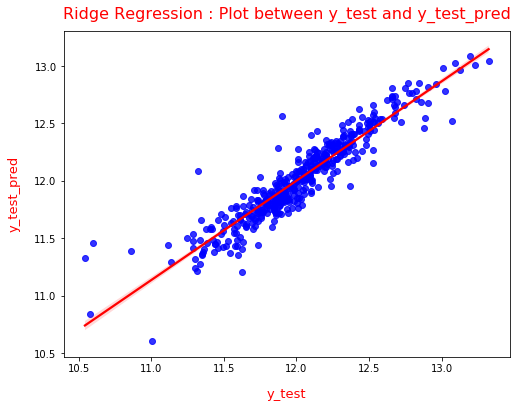

In [293]:
# Plotting y_test and y_test_pred to understand the spread after testing the model on unseen data.

# Setting the figure size

plt.figure(figsize=(8,6))

#Ploting the regression plot

sns.regplot(y_test,y_test_pred,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot

plt.title('Ridge Regression : Plot between y_test and y_test_pred', fontsize=16,color='red',pad=12)             
plt.xlabel('y_test', fontsize=13,color='red',labelpad=14)                          
plt.ylabel('y_test_pred', fontsize=13,color='red',labelpad=14)    

# Displaying the plot

plt.show()

#### Inference:

- The above regression plot between **y_test** and **y_test_pred** shows that the predicted values are equally distributed along the `regression line/ best fit line.`


- Which means, our predicted model will able to **generalize** the output based on unknown dataset.

## Lasso Regularization

### Hyperparameter tuning to select optimal Alpha

In [294]:
# Lasso Regression

# List of alphas to tune the hyperparameter for below list of alpha

params = {'alpha': [0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Initialize the Ridge Regression 

lasso = Lasso()

# Cross validation initialization with Kfold

folds=KFold(n_splits=5,random_state=100,shuffle=True)

# Using GridSearchCV to tune hyperparameter 

model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring='neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)   

# Fitting the model for grid search CV 

model_cv_lasso.fit(X_train_model, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [295]:
# Creating dataframe for grid search cv results for mean test and train score

cv_result_lasso=pd.DataFrame(model_cv_lasso.cv_results_)

# Displaying the CV results 

cv_result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049403,2.943359e-02,0.0020,6.324851e-04,0.001,{'alpha': 0.001},-0.015749,-0.037817,-0.018030,-0.024766,-0.015598,-0.022392,0.008401,1,-0.019377,-0.015592,-0.018683,-0.017013,-0.019101,-0.017953,0.001438
1,0.009200,9.799877e-04,0.0024,4.898819e-04,0.01,{'alpha': 0.01},-0.031389,-0.057204,-0.032925,-0.042296,-0.029477,-0.038658,0.010268,2,-0.038503,-0.032603,-0.038364,-0.035370,-0.038783,-0.036725,0.002404
2,0.009600,2.939580e-03,0.0030,1.168008e-07,0.05,{'alpha': 0.05},-0.038231,-0.060839,-0.041014,-0.050015,-0.039962,-0.046012,0.008461,3,-0.046347,-0.039864,-0.046604,-0.043570,-0.046983,-0.044674,0.002691
3,0.007000,6.325605e-04,0.0026,4.898819e-04,0.1,{'alpha': 0.1},-0.049682,-0.069691,-0.057717,-0.063816,-0.056957,-0.059573,0.006760,4,-0.059665,-0.054068,-0.060260,-0.057349,-0.060570,-0.058382,0.002435
4,0.020001,2.452061e-02,0.0024,4.897846e-04,0.2,{'alpha': 0.2},-0.095474,-0.119857,-0.113547,-0.118584,-0.116108,-0.112714,0.008887,5,-0.112186,-0.109216,-0.112305,-0.110968,-0.113558,-0.111647,0.001466
5,0.006800,7.483027e-04,0.0022,3.999710e-04,0.3,{'alpha': 0.3},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
6,0.007801,2.135431e-03,0.0022,3.999710e-04,0.4,{'alpha': 0.4},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
7,0.007400,4.899209e-04,0.0026,8.000612e-04,0.5,{'alpha': 0.5},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
8,0.006600,1.743647e-03,0.0024,4.899793e-04,0.6,{'alpha': 0.6},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
9,0.026002,3.753614e-02,0.0022,3.999472e-04,0.7,{'alpha': 0.7},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464


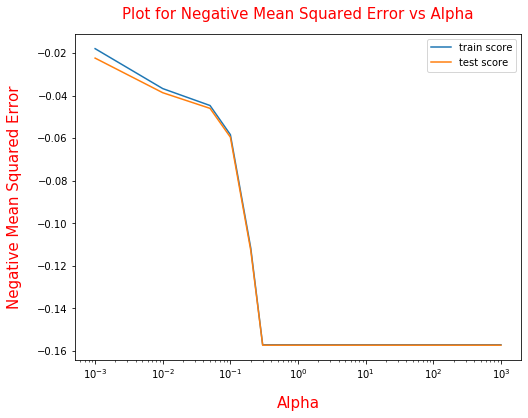

In [296]:
# Calling the custom function for line plot for param alpha VS mean_train score and mean_test score for Lasso regression

cv_result_plot(cv_result_lasso,'log')

In [297]:
# Displaying the best parameter for alpha for lasso regression

model_cv_lasso.best_params_

{'alpha': 0.001}

#### Inference:

- After hyperparameter tuning, we got best alpha (hyperparameter) for Lasso as **0.001**

#### Model fitment with best alpha

In [298]:
# Displaying the best score  for mean negative mean squared error after grid search CV for lasso

model_cv_lasso.best_score_

-0.022391969228657993

In [299]:
# storing the best estimator from grid search cv for lasso regularization in a variable to fit the model

best_estimator_lasso=model_cv_lasso.best_estimator_

In [300]:
# fitting the model with best estimator for lasso regression

best_estimator_lasso.fit(X_train_model, y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [301]:
# Predicting the y_train_pred from the trained model

y_train_pred=best_estimator_lasso.predict(X_train_model)

In [302]:
# calling the custom function for displaying the evaluation metrics after lasso regression
print('For Train Dataset Evaluation : Lasso Regression')
print_evaluation_metrics(y_train,y_train_pred)

For Train Dataset Evaluation : Lasso Regression
-----------------------------------
MSE:0.018510898357847964
RMSE:0.13605476234901873
R2 Score:0.8822045047143641
R2 Score Percentage:88.22045047143641
-----------------------------------


#### Inference:

- The calculated **R-squared** value of train dataset is **0.8822** or **88.22%**, which means the model is able to explain 88.22% variance in it.
- This a very **good r2_score** value.
- The calculated **MSE (mean squared error)** value of train dataset is **0.01851089** and **RMSE (Root mean squared error)** value on train dataset is **0.13605476**.
- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

In [303]:
# Diaplaying the model coefficients after lasso regression

# Building the dataframe

model_parameters_lasso=pd.DataFrame()

# Storing the features

model_parameters_lasso['Features']=X_train_model.columns

# Storing the coefficient after lasso regression model

model_parameters_lasso['Coefficients']=best_estimator_lasso.coef_ 

# Displaing the dataframe with features and its coefficient after lasso regression

model_parameters_lasso


,Features,Coefficients
0,1stFlrSF,0.030570
1,2ndFlrSF,0.009596
2,GrLivArea,0.134102
3,GarageCars,0.061487
4,AgeOfHouse,-0.087155
5,MSSubClass_1-STORY 1945 & OLDER,-0.107942
6,MSSubClass_1-STORY PUD (Planned Unit Developme...,-0.016084
7,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.000000
8,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...,-0.000000
9,MSSubClass_2-1/2 STORY ALL AGES,0.000000


#### Inference:

- Above dataframe is showing value of coefficients with respective predictor features.

- We can see that, **coefficients** of some of the features like  `Exterior1st_Plywood`, `BsmtQual_Fa`, `HeatingQC_Po`, `GarageFinish_No Garage`, `SaleCondition_Others` etc. has become **zero** after Lasso Regularization

In [304]:
# Displaing the dataframe with features and its top 10 coefficient sorted with respect of it importance after lasso regression

model_parameters_lasso_df=model_parameters_lasso.reindex(model_parameters_lasso['Coefficients'].abs().sort_values(ascending=False).index).head(10)

# Displaying the top 10 coefficient for lasso

model_parameters_lasso_df

,Features,Coefficients
39,OverallQual_Excellent,0.246243
49,OverallCond_Fair,-0.214216
20,Neighborhood_Crawfor,0.167193
62,BsmtQual_No Basement,-0.165331
44,OverallQual_Very Good,0.148884
2,GrLivArea,0.134102
5,MSSubClass_1-STORY 1945 & OLDER,-0.107942
26,Neighborhood_NridgHt,0.105390
10,MSSubClass_2-STORY PUD - 1946 & NEWER,-0.096142
47,OverallCond_Below Average,-0.090311


#### Inference:

- Above dataframe is showing the **top 10 best features** with there coefficients that predict the price of the house.
- Following features are having **positive** impact on housing sales price.
    - OverallQual_Excellent
    - Neighborhood_Crawfor
    - OverallQual_Very Good
    - GrLivArea
    - Neighborhood_NridgHt
    
    
- Following features are having **negative** impact on housing sales price.
    - OverallCond_Fair
    - BsmtQual_No Basement
    - MSSubClass_1-STORY 1945 & OLDER
    - MSSubClass_2-STORY PUD - 1946 & NEWER
    - OverallCond_Below Average

In [305]:
# Displaying the intercept after lasso regression

print('The intercept of the Lasso regression model is \033[1m'+str(best_estimator_lasso.intercept_)+'\033[0m')

The intercept of the Lasso regression model is 12.067256223943719


In [306]:
# creating the new X_test dataframe with important features

X_test_model=X_test[col_imp_features]

# Predicting the y_test_pred from the  model

y_test_pred=best_estimator_lasso.predict(X_test_model)

In [307]:
# calling the custom function for displaying the evaluation metrics after lasso regression on test dataset
print('For Test Dataset Evaluation : Lasso Regression')
print_evaluation_metrics(y_test,y_test_pred)

For Test Dataset Evaluation : Lasso Regression
-----------------------------------
MSE:0.021874904081283005
RMSE:0.14790167031268783
R2 Score:0.8672758314186919
R2 Score Percentage:86.72758314186919
-----------------------------------


#### Inference:

- The calculated **R-squared** value of test dataset is **0.8672** or **86.72%**, which means the model is able to explain 86.72% variance in it.
- This a very **good r2_score** value.
- The calculated **MSE (mean squared error)** value of test dataset is **0.021874904** and **RMSE (Root mean squared error)** value on test dataset is **0.147901670**.
- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

### Visualising the best fit

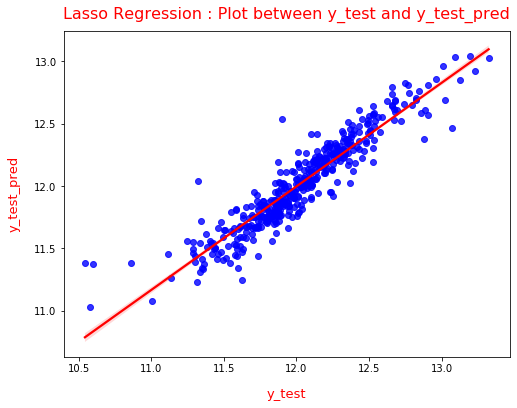

In [308]:
# Plotting y_test and y_test_pred to understand the spread after testing the model on unseen data.

# Setting the figure size

plt.figure(figsize=(8,6))

#Ploting the regression plot

sns.regplot(y_test,y_test_pred,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot

plt.title('Lasso Regression : Plot between y_test and y_test_pred', fontsize=16,color='red',pad=12)             
plt.xlabel('y_test', fontsize=13,color='red',labelpad=14)                          
plt.ylabel('y_test_pred', fontsize=13,color='red',labelpad=14)    

# Displaying the plot

plt.show()

#### Inference:

- The above regression plot between **y_test** and **y_test_pred** shows that the predicted values are equally distributed along the regression line/ best fit line.

- Which means, our predicted model will able to **generalize** the output based on unknown dataset.

# Conclusion

#### Ridge Regularization (alpha = 0.6)

- Top features which explain the `Sale price of the house along with their coefficients` value which describe `how well these features helps in predicting the Sale price` of the house

    - OverallQual_Poor	= **-0.430963**
    - OverallQual_Excellent	= **0.233964**
    - OverallCond_Fair =	**-0.225721**
    - Neighborhood_Crawfor =	**0.216982**
    - HeatingQC_Po =	**-0.194974**
    - Neighborhood_ClearCr =	**0.190067**
    - Neighborhood_NoRidge = **0.186998**
    - Neighborhood_NridgHt =	**0.175200**
    - OverallQual_Very Poor =	**-0.170494**
    - OverallCond_Very Poor =	**-0.170494**


#### Lasso Regularization  (alpha = 0.001)

- Top features which explain the `Sale price of the house along with their coefficients` value which describe `how well these features helps in predicting the Sale price` of the house

    - OverallQual_Excellent =	**0.246243**
    - OverallCond_Fair = **-0.214216**
    - Neighborhood_Crawfor = **0.167193**
    - BsmtQual_No Basement = **-0.165331**
    - OverallQual_Very Good = **0.148884**
    - GrLivArea	= **0.134102**
    - MSSubClass_1-STORY 1945 & OLDER	= **-0.107942**
    - Neighborhood_NridgHt =	**0.105390**
    - MSSubClass_2-STORY PUD - 1946 & NEWER =	**-0.096142**
    - OverallCond_Below Average =	**-0.090311**

# Subjective Questions:

## Question 1:

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [309]:
# Subjective question 1: 

# Printing Optimal value of alpha ridge and lasso regression 

# fetching the value of alpha for ridge regression

ridge_optimal_alpha=list(model_cv.best_params_.values())[0]

# fetching the value of alpha for lasso regression

lasso_optimal_alpha=list(model_cv_lasso.best_params_.values())[0]

#printing the valus of alphas for both regression

print('Optimal value of alpha for Ridge regularization is : ',ridge_optimal_alpha)
print('Optimal value of alpha for Lasso regularization is : ',lasso_optimal_alpha)

Optimal value of alpha for Ridge regularization is :  0.6
Optimal value of alpha for Lasso regularization is :  0.001


### Ridge Regression with new alpha

In [310]:
# fitting the model for ridge regression with double the value of optimal alpha which is 2 * 0.6

alpha_ridge=ridge_optimal_alpha*2
ridge=Ridge(alpha=alpha_ridge)
ridge.fit(X_train_model,y_train)

Ridge(alpha=1.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [311]:
# Predicting the y_train_pred from the trained model

y_train_pred_new=ridge.predict(X_train_model)

In [312]:
# calling the custom function for displaying the evaluation metrics after ridge regression
print('For Train Dataset Evaluation : Ridge Regression')
print_evaluation_metrics(y_train,y_train_pred_new)

For Train Dataset Evaluation : Ridge Regression
-----------------------------------
MSE:0.015240514339808409
RMSE:0.12345247806264728
R2 Score:0.9030158396226923
R2 Score Percentage:90.30158396226923
-----------------------------------


In [313]:
# Diaplaying the model coefficients after ridge regression

# Building the dataframe

model_param_ridge=pd.DataFrame()

# Storing the features

model_param_ridge['Features']=X_train_model.columns

# Storing the coefficient after ridge regression model

model_param_ridge['Coefficients']=ridge.coef_ 

# Displaing the dataframe with features and its top 10 coefficient sorted with respect of it importance after ridge regression

model_param_ridge.reindex(model_param_ridge['Coefficients'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficients
42,OverallQual_Poor,-0.344325
39,OverallQual_Excellent,0.229300
49,OverallCond_Fair,-0.222252
20,Neighborhood_Crawfor,0.210999
18,Neighborhood_ClearCr,0.179105
25,Neighborhood_NoRidge,0.174227
26,Neighborhood_NridgHt,0.167369
29,Neighborhood_Somerst,0.158253
30,Neighborhood_StoneBr,0.150305
44,OverallQual_Very Good,0.146652


In [314]:
# Displaying the intercept after ridge regression

print('The intercept of the Ridge regression model is \033[1m'+str(ridge.intercept_)+'\033[0m')

The intercept of the Ridge regression model is 12.188721071258025


In [315]:
# creating the new X_test dataframe with important features

X_test_model=X_test[col_imp_features]

# Predicting the y_test_pred from the  model

y_test_pred_new=ridge.predict(X_test_model)

In [316]:
# calling the custom function for displaying the evaluation metrics after ridge regression on test dataset
print('For Test Dataset Evaluation : Ridge Regression')
print_evaluation_metrics(y_test,y_test_pred_new)

For Test Dataset Evaluation : Ridge Regression
-----------------------------------
MSE:0.020409439860617225
RMSE:0.1428616108708607
R2 Score:0.876167414190931
R2 Score Percentage:87.6167414190931
-----------------------------------


### Lasso Regression with new alpha

In [317]:
# fitting the model for lasso regression with double the value of optimal alpha which is 2 * 0.6

alpha_lasso=lasso_optimal_alpha*2
lasso=Lasso(alpha=alpha_lasso)
lasso.fit(X_train_model,y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [318]:
# Predicting the y_train_pred from the trained model

y_train_pred_new=lasso.predict(X_train_model)

In [319]:
# calling the custom function for displaying the evaluation metrics after lasso regression

print('For Train Dataset Evaluation : Lasso Regression')
print_evaluation_metrics(y_train,y_train_pred_new)

For Train Dataset Evaluation : Lasso Regression
-----------------------------------
MSE:0.02127440417062082
RMSE:0.14585747896704104
R2 Score:0.8646187274253705
R2 Score Percentage:86.46187274253705
-----------------------------------


In [320]:
# Diaplaying the model coefficients after lasso regression

# Building the dataframe

model_param_lasso=pd.DataFrame()

# Storing the features

model_param_lasso['Features']=X_train_model.columns

# Storing the coefficient after lasso regression model

model_param_lasso['Coefficients']=lasso.coef_ 

# Displaing the dataframe with features and its top 10 coefficient sorted with respect of it importance after lasso regression
model_param_lasso


,Features,Coefficients
0,1stFlrSF,0.033595
1,2ndFlrSF,0.000000
2,GrLivArea,0.145179
3,GarageCars,0.068143
4,AgeOfHouse,-0.095954
5,MSSubClass_1-STORY 1945 & OLDER,-0.068799
6,MSSubClass_1-STORY PUD (Planned Unit Developme...,-0.000000
7,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.000000
8,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...,-0.000000
9,MSSubClass_2-1/2 STORY ALL AGES,0.000000


In [321]:
model_param_lasso.reindex(model_param_lasso['Coefficients'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficients
39,OverallQual_Excellent,0.215806
49,OverallCond_Fair,-0.154575
2,GrLivArea,0.145179
44,OverallQual_Very Good,0.140872
20,Neighborhood_Crawfor,0.136954
62,BsmtQual_No Basement,-0.136827
4,AgeOfHouse,-0.095954
26,Neighborhood_NridgHt,0.084761
64,BsmtExposure_Gd,0.082663
10,MSSubClass_2-STORY PUD - 1946 & NEWER,-0.079930


In [322]:
# Displaying the intercept after lasso regression

print('The intercept of the Lasso regression model is \033[1m'+str(lasso.intercept_)+'\033[0m')

The intercept of the Lasso regression model is 12.055503863423615


In [323]:
# creating the new X_test dataframe with important features

X_test_model=X_test[col_imp_features]

# Predicting the y_test_pred from the  model

y_test_pred_new=lasso.predict(X_test_model)

In [324]:
# calling the custom function for displaying the evaluation metrics after lasso regression on test dataset

print('For Test Dataset Evaluation : Lasso Regression')
print_evaluation_metrics(y_test,y_test_pred_new)

For Test Dataset Evaluation : Lasso Regression
-----------------------------------
MSE:0.024275272761846867
RMSE:0.15580523984079248
R2 Score:0.8527117932755923
R2 Score Percentage:85.27117932755924
-----------------------------------


### NOTE:

- All explanations are given in Subject Question answer pdf document, which is submitted along with this Jupyter Notebook.

## Question 3

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

### Lasso Regularization after dropping top 5 best features based on earlier Lasso model

In [325]:
# Top 10 important feature from previous lasso model
model_parameters_lasso_df

,Features,Coefficients
39,OverallQual_Excellent,0.246243
49,OverallCond_Fair,-0.214216
20,Neighborhood_Crawfor,0.167193
62,BsmtQual_No Basement,-0.165331
44,OverallQual_Very Good,0.148884
2,GrLivArea,0.134102
5,MSSubClass_1-STORY 1945 & OLDER,-0.107942
26,Neighborhood_NridgHt,0.105390
10,MSSubClass_2-STORY PUD - 1946 & NEWER,-0.096142
47,OverallCond_Below Average,-0.090311


In [326]:
# Copying the previous important features into new dataframe

col_imp_features_new=col_imp_features.copy()

# Looping and removing the top 5 important features from Lasso which are not be available for lasso

for value in list(model_parameters_lasso_df.iloc[0:5,0]):
  col_imp_features_new.remove(value)

# Copying to new dataframe with new features

X_train_model_new=X_train[col_imp_features_new]

In [327]:
# Lasso Regression

# List of alphas to tune the hyperparameter for below list of alpha

params = {'alpha': [0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Initialize the Ridge Regression 

lasso = Lasso()

# Cross validation initialization with Kfold

folds=KFold(n_splits=5,random_state=100,shuffle=True)

# Using GridSearchCV to tune hyperparameter 

model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring='neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)   

# Fitting the model for grid search CV 

model_cv_lasso.fit(X_train_model_new, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [328]:
# Creating dataframe for grid search cv results for mean test and train score

cv_result_lasso=pd.DataFrame(model_cv_lasso.cv_results_)

# Displaying the CV results 

cv_result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043680,3.024953e-02,0.003120,0.006240,0.001,{'alpha': 0.001},-0.017821,-0.042226,-0.021842,-0.030100,-0.018089,-0.026016,0.009240,1,-0.022646,-0.018856,-0.022038,-0.019583,-0.022405,-0.021106,0.001569
1,0.003120,6.240082e-03,0.009360,0.012480,0.01,{'alpha': 0.01},-0.031850,-0.057669,-0.033324,-0.042687,-0.029897,-0.039085,0.010279,2,-0.038864,-0.032983,-0.039000,-0.035630,-0.039340,-0.037163,0.002483
2,0.000000,0.000000e+00,0.003120,0.006240,0.05,{'alpha': 0.05},-0.038231,-0.060839,-0.041014,-0.050015,-0.039962,-0.046012,0.008461,3,-0.046347,-0.039864,-0.046604,-0.043570,-0.046983,-0.044674,0.002691
3,0.009360,7.642352e-03,0.003120,0.006240,0.1,{'alpha': 0.1},-0.049682,-0.069691,-0.057717,-0.063816,-0.056957,-0.059573,0.006760,4,-0.059665,-0.054068,-0.060260,-0.057349,-0.060570,-0.058382,0.002435
4,0.012480,6.240082e-03,0.000000,0.000000,0.2,{'alpha': 0.2},-0.095474,-0.119857,-0.113547,-0.118584,-0.116108,-0.112714,0.008887,5,-0.112186,-0.109216,-0.112305,-0.110968,-0.113558,-0.111647,0.001466
5,0.007920,3.839779e-03,0.002400,0.000490,0.3,{'alpha': 0.3},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
6,0.010801,5.671341e-03,0.002200,0.000400,0.4,{'alpha': 0.4},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
7,0.006800,1.600003e-03,0.012801,0.017210,0.5,{'alpha': 0.5},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
8,0.008401,4.317595e-03,0.002400,0.000490,0.6,{'alpha': 0.6},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
9,0.006400,4.899792e-04,0.003800,0.003124,0.7,{'alpha': 0.7},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464


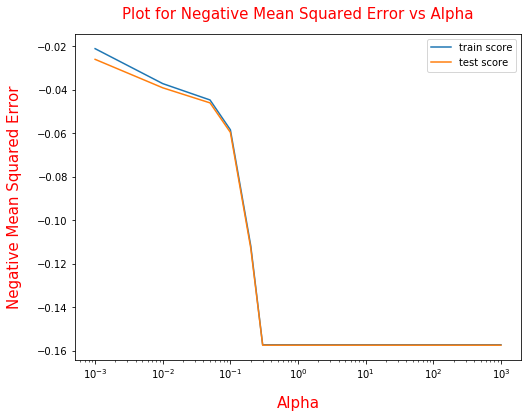

In [329]:
# Calling the custom function for line plot for param alpha VS mean_train score and mean_test score for Lasso regression

cv_result_plot(cv_result_lasso,'log')

In [330]:
# Displaying the best parameter for alpha for lasso regression

model_cv_lasso.best_params_

{'alpha': 0.001}

In [331]:
# Displaying the best score  for mean negative mean squared error after grid search CV for lasso

model_cv_lasso.best_score_

-0.02601561091997894

In [332]:
# storing the best estimator from grid search cv for lasso regularization in a variable to fit the model

best_estimator_lasso=model_cv_lasso.best_estimator_

In [333]:
# fitting the model with best estimator for lasso regression

best_estimator_lasso.fit(X_train_model_new, y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [334]:
# Predicting the y_train_pred from the trained model

y_train_pred=best_estimator_lasso.predict(X_train_model_new)

In [335]:
# calling the custom function for displaying the evaluation metrics after lasso regression
print('For Train Dataset Evaluation : Lasso Regression')
print_evaluation_metrics(y_train,y_train_pred)

For Train Dataset Evaluation : Lasso Regression
-----------------------------------
MSE:0.021739873317396213
RMSE:0.14744447537088737
R2 Score:0.8616566794672094
R2 Score Percentage:86.16566794672093
-----------------------------------


In [336]:
# Diaplaying the model coefficients after lasso regression

# Building the dataframe

model_parameters_lasso=pd.DataFrame()

# Storing the features

model_parameters_lasso['Features']=X_train_model_new.columns

# Storing the coefficient after lasso regression model

model_parameters_lasso['Coefficients']=best_estimator_lasso.coef_ 

# Displaing the dataframe with features and its coefficient after lasso regression

model_parameters_lasso


,Features,Coefficients
0,1stFlrSF,0.021108
1,2ndFlrSF,0.000000
2,GrLivArea,0.155257
3,GarageCars,0.064836
4,AgeOfHouse,-0.077714
5,MSSubClass_1-STORY 1945 & OLDER,-0.119377
6,MSSubClass_1-STORY PUD (Planned Unit Developme...,-0.010352
7,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.000000
8,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...,-0.003257
9,MSSubClass_2-1/2 STORY ALL AGES,0.000000


In [337]:
# Displaing the dataframe with features and its top 10 coefficient sorted with respect of it importance after lasso regression

model_parameters_lasso_df=model_parameters_lasso.reindex(model_parameters_lasso['Coefficients'].abs().sort_values(ascending=False).index).head(10)

# Displaying the top 10 coefficient for lasso now

model_parameters_lasso_df

,Features,Coefficients
61,BsmtFinType1_No Basement,-0.202419
25,Neighborhood_NridgHt,0.157007
2,GrLivArea,0.155257
65,KitchenQual_Fa,-0.134786
10,MSSubClass_2-STORY PUD - 1946 & NEWER,-0.128252
5,MSSubClass_1-STORY 1945 & OLDER,-0.119377
67,KitchenQual_TA,-0.118642
28,Neighborhood_Somerst,0.111953
38,OverallQual_Fair,-0.109185
37,OverallQual_Below Average,-0.106635


In [338]:
# Displaying the intercept after lasso regression

print('The new intercept of the Lasso regression model is \033[1m'+str(best_estimator_lasso.intercept_)+'\033[0m')

The new intercept of the Lasso regression model is 12.166473375981058


In [339]:
# creating the new X_test dataframe with important features

X_test_model_new=X_test[col_imp_features_new]

# Predicting the y_test_pred from the  model

y_test_pred=best_estimator_lasso.predict(X_test_model_new)

In [340]:
# calling the custom function for displaying the evaluation metrics after lasso regression on test dataset
print('For Test Dataset Evaluation : Lasso Regression')
print_evaluation_metrics(y_test,y_test_pred)

For Test Dataset Evaluation : Lasso Regression
-----------------------------------
MSE:0.024453487893314235
RMSE:0.15637611036636714
R2 Score:0.8516304877272469
R2 Score Percentage:85.1630487727247
-----------------------------------


### NOTE:

- All explanations are given in Subject Question answer pdf document, which is submitted along with this Jupyter Notebook.

                                                   ##END##